In [1]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [645]:
library(e1071)
library(class)
library(rpart)
library(caret)

library(nnet)
library(dplyr)
library(stringr)
library(plotrix)
library(NbClust)

In [414]:
carcar <- read.csv("./file/carcar.csv")

In [416]:
table(carcar$brand)


   alfa-romeo  aston-martin          audi       bentley           bmw 
         1437           277         21161           541         19810 
     cadillac     chevrolet      chrysler       citroen         dacia 
          157           191            32          4083          3367 
       daewoo      daihatsu         dodge       ferrari          fiat 
           61           204           669           590          5039 
         ford         honda       hyundai      infiniti         isuzu 
        18790           785          6989           112           206 
       jaguar          jeep           kia          lada   lamborghini 
         1398          1749          5734           191           361 
       lancia    land-rover      maserati         mazda mercedes-benz 
          105          3073           698          4211         27226 
         mini    mitsubishi        nissan          opel       peugeot 
         4295           934          3784         20388          5848 
     

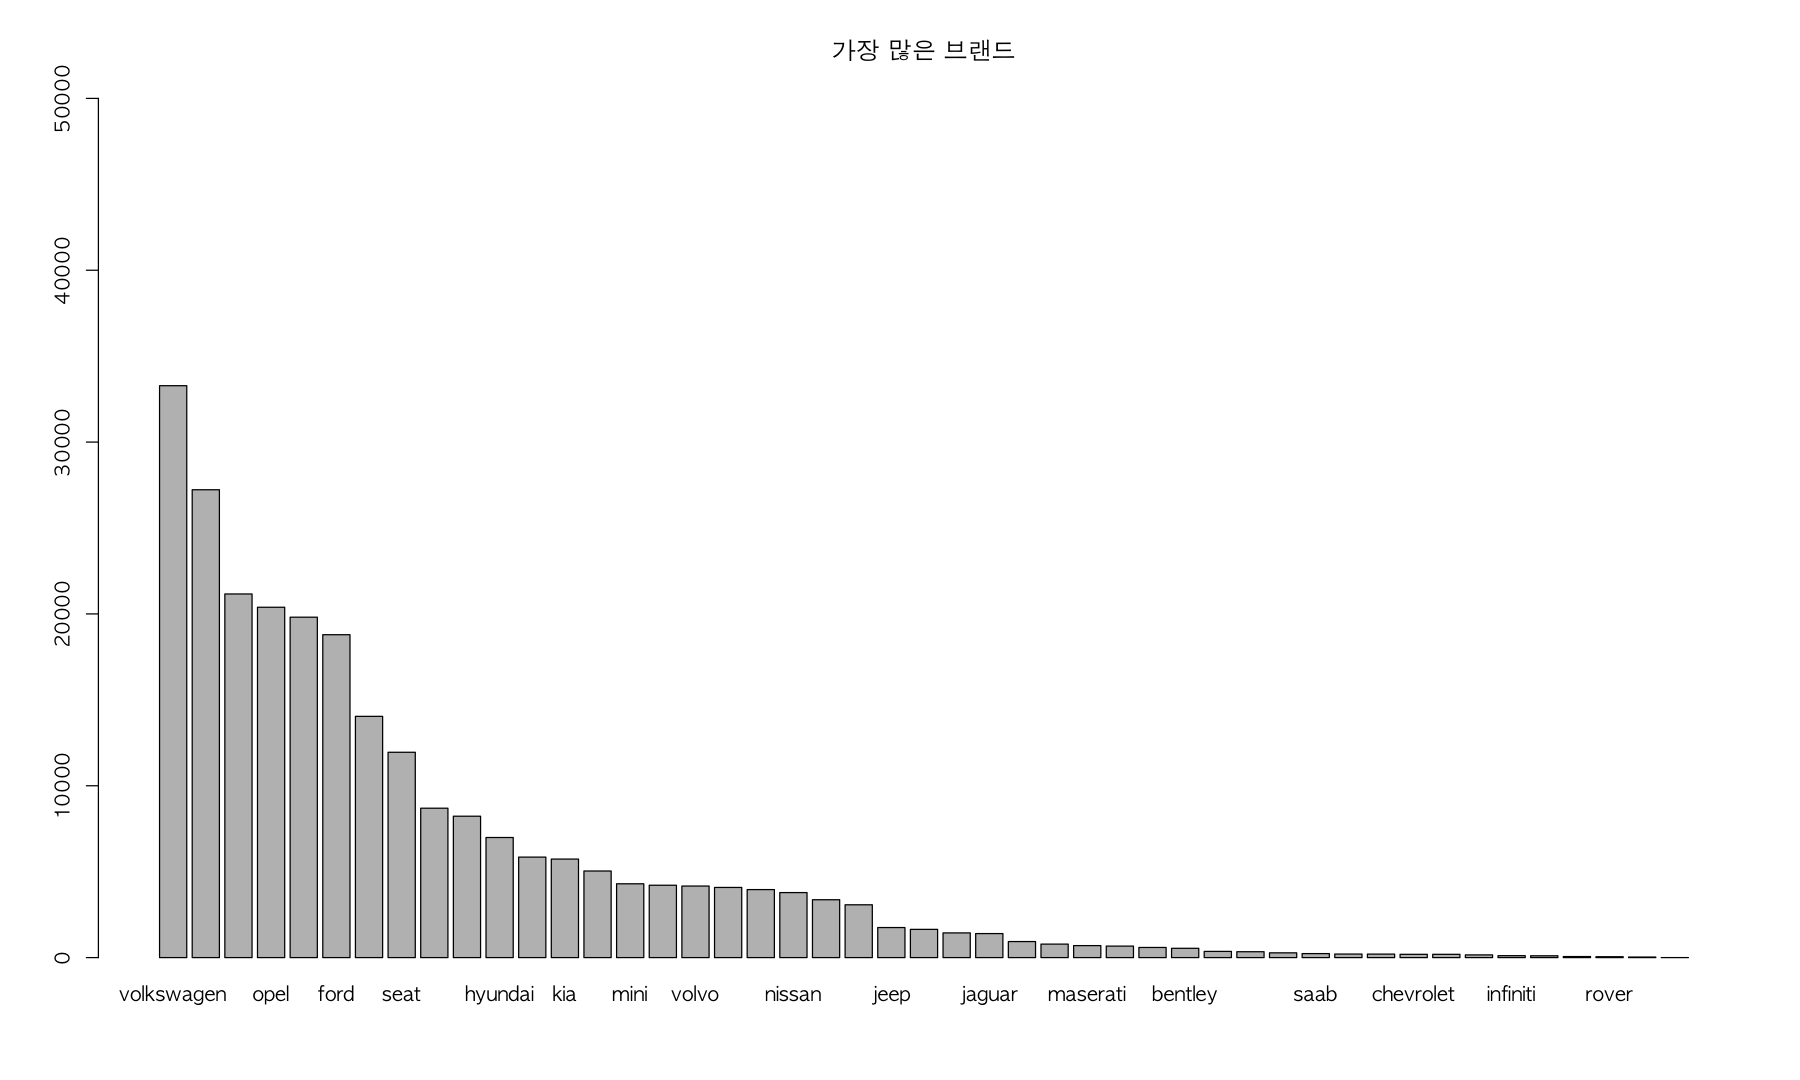

In [480]:
options(scipen = 100)
par(family = "AppleGothic", bg = 'white')
barplot(sort(table(carcar$brand),decreasing = T),
main = "가장 많은 브랜드",
#col = c('red',rep('black',13)),
ylim = c(0,50000)
)


# 폭스바겐 선정

In [493]:
head(carcar)
wagen <- subset(carcar, carcar$brand == 'volkswagen')

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500,2.0 V6 TB
2,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,,- (g/km),190000,"Q4 Allrad, 3.2L GTA"
3,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,,- (g/km),129000,ALFA ROME 916
4,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500,2.0 16V Twin Spark L
5,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127,"3.0i Super V6, absoluter Topzustand !"
6,5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,47307,2.0 16V Twin Spark


# 색깔 결측치 를 제일 많은 색깔로 대체

In [494]:

wagen$color <- ifelse(wagen$color == '','black', wagen$color )
table(wagen$color)


 beige  black   blue bronze  brown   gold  green   grey orange    red silver 
   796   6662   5226    132   1077    144    656   4684    719   3203   5863 
violet  white yellow 
    91   3528    500 

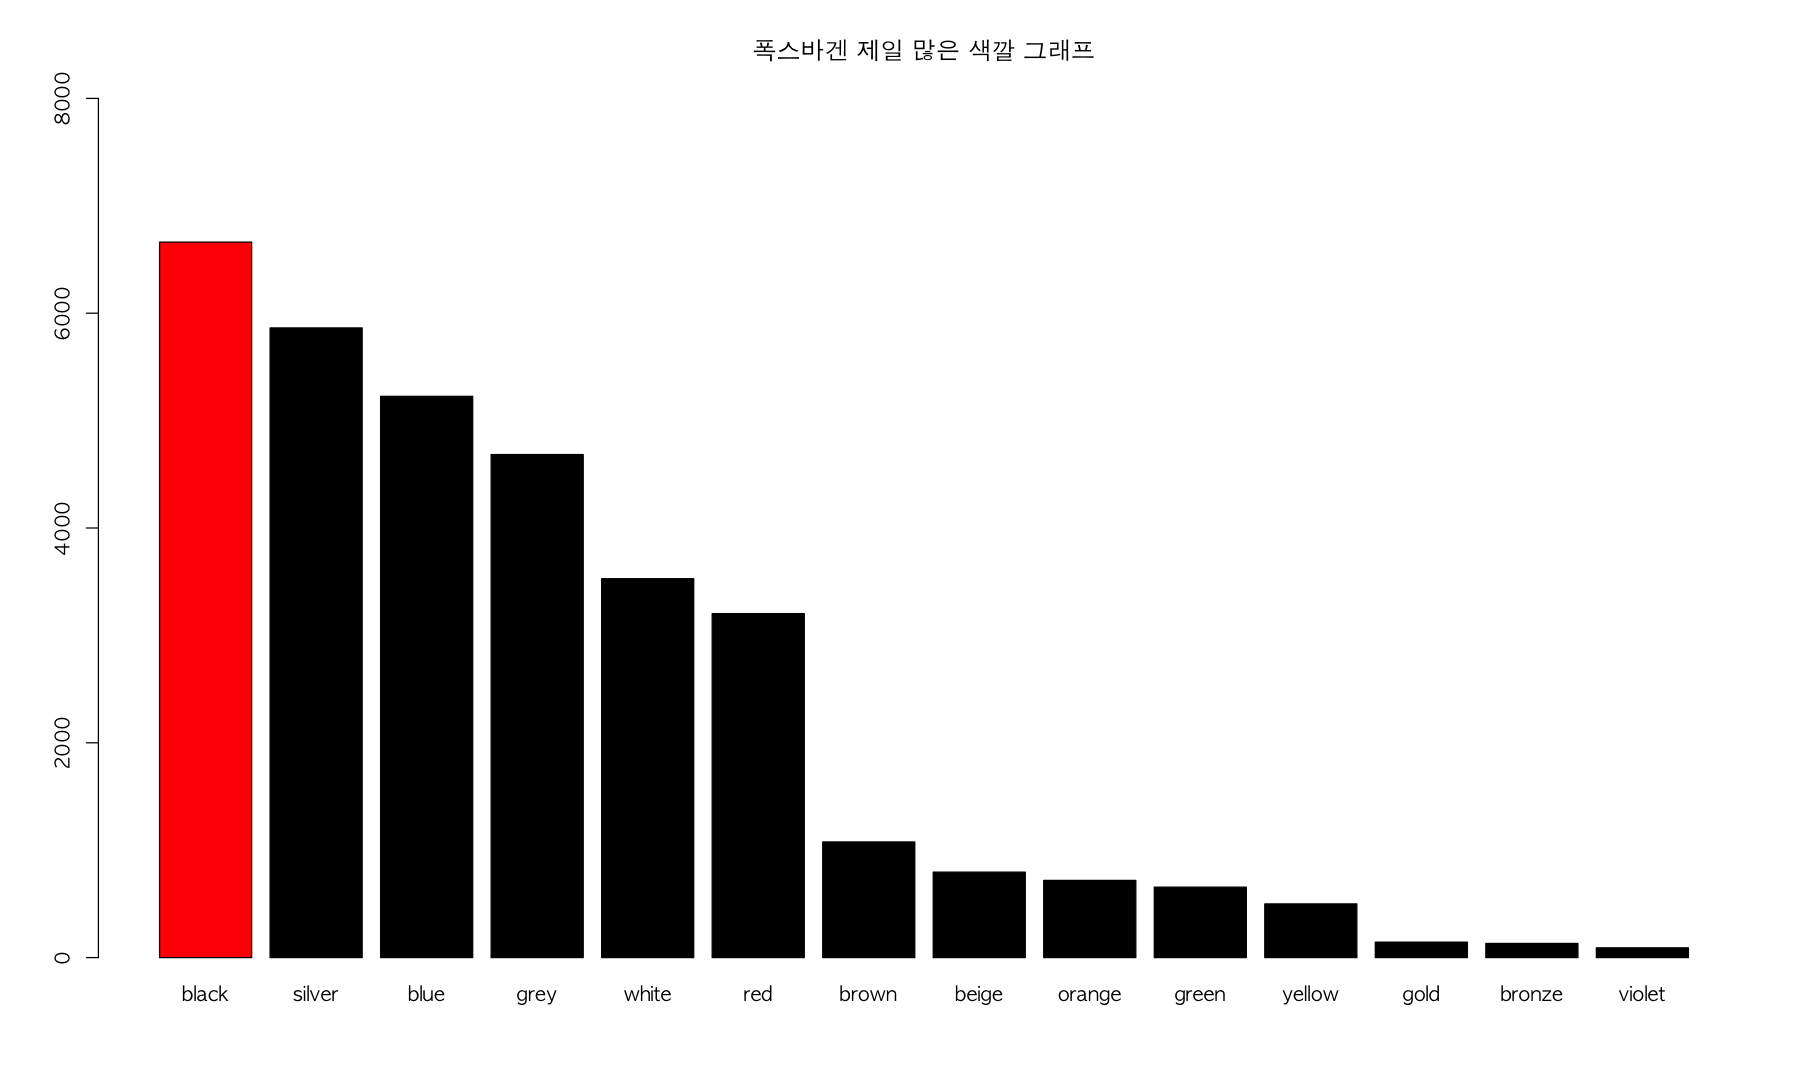

In [495]:
options(scipen = 100)
par(family = "AppleGothic", bg = 'white')
barplot(sort(table(wagen$color),decreasing = T),
main = "폭스바겐 제일 많은 색깔 그래프",
col = c('red',rep('black',13)),
ylim = c(0,8000)
)

### transmission_type 컬럼에서 사용할  Automatic , Manual 만 남기기

In [498]:
wagen <- wagen[wagen$transmission_type != 'Semi-automatic', ]
table(wagen$transmission_type)


Automatic    Manual 
    12894     19083 

### fuel_type 컬럼에서 사용할 Diesel , Petrol 만 남기기

In [500]:
wagen  <- subset(wagen , fuel_type == 'Diesel' | fuel_type == 'Petrol')

### 가격에 결측치 혹은 다른 데이터가 있는지 체크

In [499]:
wagen <- wagen[wagen$price_in_euro != 'ROSTFREI', ]
table(wagen$price_in_euro)


  1000  10000  10020  10099  10100  10130  10149  10180  10190 101980  10199 
    23     62      1      1      5      1      1      1      2      1      5 
 10200  10250  10285  10288  10290 102960  10299  10300  10347  10350  10353 
     8     13      1      1      3      1      3     17      1      3      1 
 10370  10380  10390  10398 103985  10399  10400  10415  10420  10445  10449 
     2      2      3      2      1      4     14      1      1      1      1 
 10450  10460  10470  10472  10477  10480  10489  10490  10491  10495  10499 
    22      2      3      1      1     10      1     46      1      1     32 
  1050  10500  10505  10549  10550  10559  10570  10580  10590  10591  10595 
     4     78      1      1      1      1      3      3     10      1      1 
 10599  10600  10650  10660  10670  10680  10690  10695  10698 106980  10699 
     5     16      7      1      1      2     19      1      1      1      5 
 10700  10710  10730  10746  10749  10750  10777  10780  10785 

In [501]:
head(wagen)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
213635,213634,volkswagen,Volkswagen T4 Kombi,beige,03/1995,1995,18500,81,110,Manual,Petrol,,- (g/km),57000,T4 Kombi * 2.5 * lange Version * 57 tkm * 1.Hand *
213636,213635,volkswagen,Volkswagen T4 Caravelle,beige,05/1995,1995,18500,63,86,Manual,Diesel,,- (g/km),25560,70 X 0C
213637,213636,volkswagen,Volkswagen T4,beige,02/1995,1995,6500,81,110,Manual,Petrol,"13,5 l/100 km",- (g/km),290000,Transporter 70A 1D2
213638,213637,volkswagen,Volkswagen Polo,blue,06/1995,1995,11500,83,113,Manual,Petrol,,- (g/km),130000,Polo G 40
213639,213638,volkswagen,Volkswagen T4,blue,07/1995,1995,1800,50,68,Manual,Diesel,,- (g/km),267000,Transporter TD
213640,213639,volkswagen,Volkswagen,blue,06/1995,1995,2975,70,95,Manual,Diesel,,-/-,215500,LT 28 Doka Pritche


### 연비 데이터 정제 

- 연비에 결측치를 제거한다

In [502]:
wagen <- wagen[wagen$fuel_consumption_l_100km != '- (l/100 km)', ]
table(wagen$fuel_consumption_l_100km)



               0,2 l/100 km  0,8 l/100 km    1 l/100 km  1,1 l/100 km 
         2225             3             1             5             2 
 1,2 l/100 km  1,3 l/100 km  1,5 l/100 km  1,6 l/100 km  1,7 l/100 km 
            1             1             2             1             2 
 1,9 l/100 km   10 l/100 km 10,1 l/100 km 10,2 l/100 km 10,3 l/100 km 
            1            26            20            32             4 
10,4 l/100 km 10,5 l/100 km 10,6 l/100 km 10,7 l/100 km 10,8 l/100 km 
            8            14            16            16             9 
10,9 l/100 km   11 l/100 km 11,1 l/100 km 11,2 l/100 km 11,3 l/100 km 
           21             8             3             5             5 
11,4 l/100 km 11,6 l/100 km 11,8 l/100 km 11,9 l/100 km   12 l/100 km 
            5             1             3             5             2 
12,1 l/100 km 12,2 l/100 km 12,3 l/100 km 12,4 l/100 km 12,5 l/100 km 
            3             1             1             4             3 
12,6 

In [504]:
#wagen[12]
wagen$fuel_consumption_l_100km <- gsub(" l/100 km", "", wagen$fuel_consumption_l_100km)


연비 컬럼 단위 제거 , 컴마 대체

In [506]:
benz$fuel_consumption_l_100km <- gsub(",", ".", benz$fuel_consumption_l_100km)
benz <- benz[wagen$fuel_consumption_l_100km != '', ]
benz$fuel_consumption_l_100km <- as.numeric(gsub(" l/100 km", "", benz$fuel_consumption_l_100km))
table(benz$fuel_consumption_l_100km)


          0,2           0,8             1           1,1           1,2 
            3             1             5             2             1 
          1,3           1,5           1,6           1,7           1,9 
            1             2             1             2             1 
           10          10,1          10,2          10,3          10,4 
           26            20            32             4             8 
         10,5          10,6          10,7          10,8          10,9 
           14            16            16             9            21 
           11          11,1          11,2          11,3          11,4 
            8             3             5             5             5 
         11,6          11,8          11,9            12          12,1 
            1             3             5             2             3 
         12,2          12,3          12,4          12,5          12,6 
            1             1             4             3             5 
     

In [508]:
wagen$fuel_consumption_l_100km <- gsub(",", ".", wagen$fuel_consumption_l_100km)

In [514]:
head(wagen)
wagen <- wagen[wagen$fuel_consumption_l_100km != '3.6 kg/100 km', ]
table(wagen$fuel_consumption_l_100km)


,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
213637,213636,volkswagen,Volkswagen T4,beige,02/1995,1995,6500,81,110,Manual,Petrol,13.5,- (g/km),290000,Transporter 70A 1D2
213645,213644,volkswagen,Volkswagen Golf,blue,08/1995,1995,4970,66,90,Manual,Petrol,8,192 g/km,159243,Cabrio 1.8 Colour Concept
213646,213645,volkswagen,Volkswagen Golf,blue,02/1995,1995,2590,66,90,Automatic,Petrol,6.8,196 g/km,141600,1.8 Pink Floyd *AUTOMATIK / 2.HAND / TÜV NEU*
213647,213646,volkswagen,Volkswagen Passat Variant,blue,03/1995,1995,800,66,90,Manual,Petrol,8.8,- (g/km),346000,1.8 CL
213648,213647,volkswagen,Volkswagen Golf,blue,11/1995,1995,8900,128,174,Automatic,Petrol,10.5,252 g/km,162640,3 2.8 VR6 Colour Concept Leder Klima Sitzheizung
213649,213648,volkswagen,Volkswagen Corrado,blue,12/1995,1995,9900,85,116,Manual,Petrol,5.7,- (g/km),116000,2.0 1.Hand Nur 116.000km TÜV



 0.2  0.8    1  1.1  1.2  1.3  1.5  1.6  1.7  1.9   10 10.1 10.2 10.3 10.4 10.5 
   3    1    5    2    1    1    2    1    2    1   26   20   32    4    8   14 
10.6 10.7 10.8 10.9   11 11.1 11.2 11.3 11.4 11.6 11.8 11.9   12 12.1 12.2 12.3 
  16   16    9   21    8    3    5    5    5    1    3    5    2    3    1    1 
12.4 12.5 12.6 12.8 12.9   13 13.1 13.2 13.3 13.4 13.5 13.8 13.9  130   14 14.5 
   4    3    5   10    1    3    4    1    4    3    1    5    3    1    1    4 
14.8  143  146 15.7 15.9   16  2.6  2.9   26    3  3.1  3.2  3.3  3.4  3.5  3.6 
   4    1    1    2    3    1    1    3    1    4    1    5    7   40   13   66 
 3.7  3.8  3.9   30   36    4  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9    5 
  72  206  219    1    1  242  485  528  307  527  873  831  693  893 1117  855 
 5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9    6  6.1  6.2  6.3  6.4  6.5  6.6 
1232 1028  919  668  980  550  831  986 1227  850  584  629  841 1098  543  888 
 6.7  6.8  6.9   61    7  7

In [515]:
head(wagen)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
213637,213636,volkswagen,Volkswagen T4,beige,02/1995,1995,6500,81,110,Manual,Petrol,13.5,- (g/km),290000,Transporter 70A 1D2
213645,213644,volkswagen,Volkswagen Golf,blue,08/1995,1995,4970,66,90,Manual,Petrol,8,192 g/km,159243,Cabrio 1.8 Colour Concept
213646,213645,volkswagen,Volkswagen Golf,blue,02/1995,1995,2590,66,90,Automatic,Petrol,6.8,196 g/km,141600,1.8 Pink Floyd *AUTOMATIK / 2.HAND / TÜV NEU*
213647,213646,volkswagen,Volkswagen Passat Variant,blue,03/1995,1995,800,66,90,Manual,Petrol,8.8,- (g/km),346000,1.8 CL
213648,213647,volkswagen,Volkswagen Golf,blue,11/1995,1995,8900,128,174,Automatic,Petrol,10.5,252 g/km,162640,3 2.8 VR6 Colour Concept Leder Klima Sitzheizung
213649,213648,volkswagen,Volkswagen Corrado,blue,12/1995,1995,9900,85,116,Manual,Petrol,5.7,- (g/km),116000,2.0 1.Hand Nur 116.000km TÜV


In [517]:
wagen <- wagen[,-c(1,5,8,13,15)]

### 색상 150개 이하 버리기

In [521]:
wagen <- wagen[wagen$color != 'bronze', ]
table(wagen$color)


 beige  black   blue  brown  green   grey orange    red silver  white yellow 
   690   6128   4672   1002    553   4191    655   2824   5262   3001    399 

### 모델이 가장 많은 탑 3

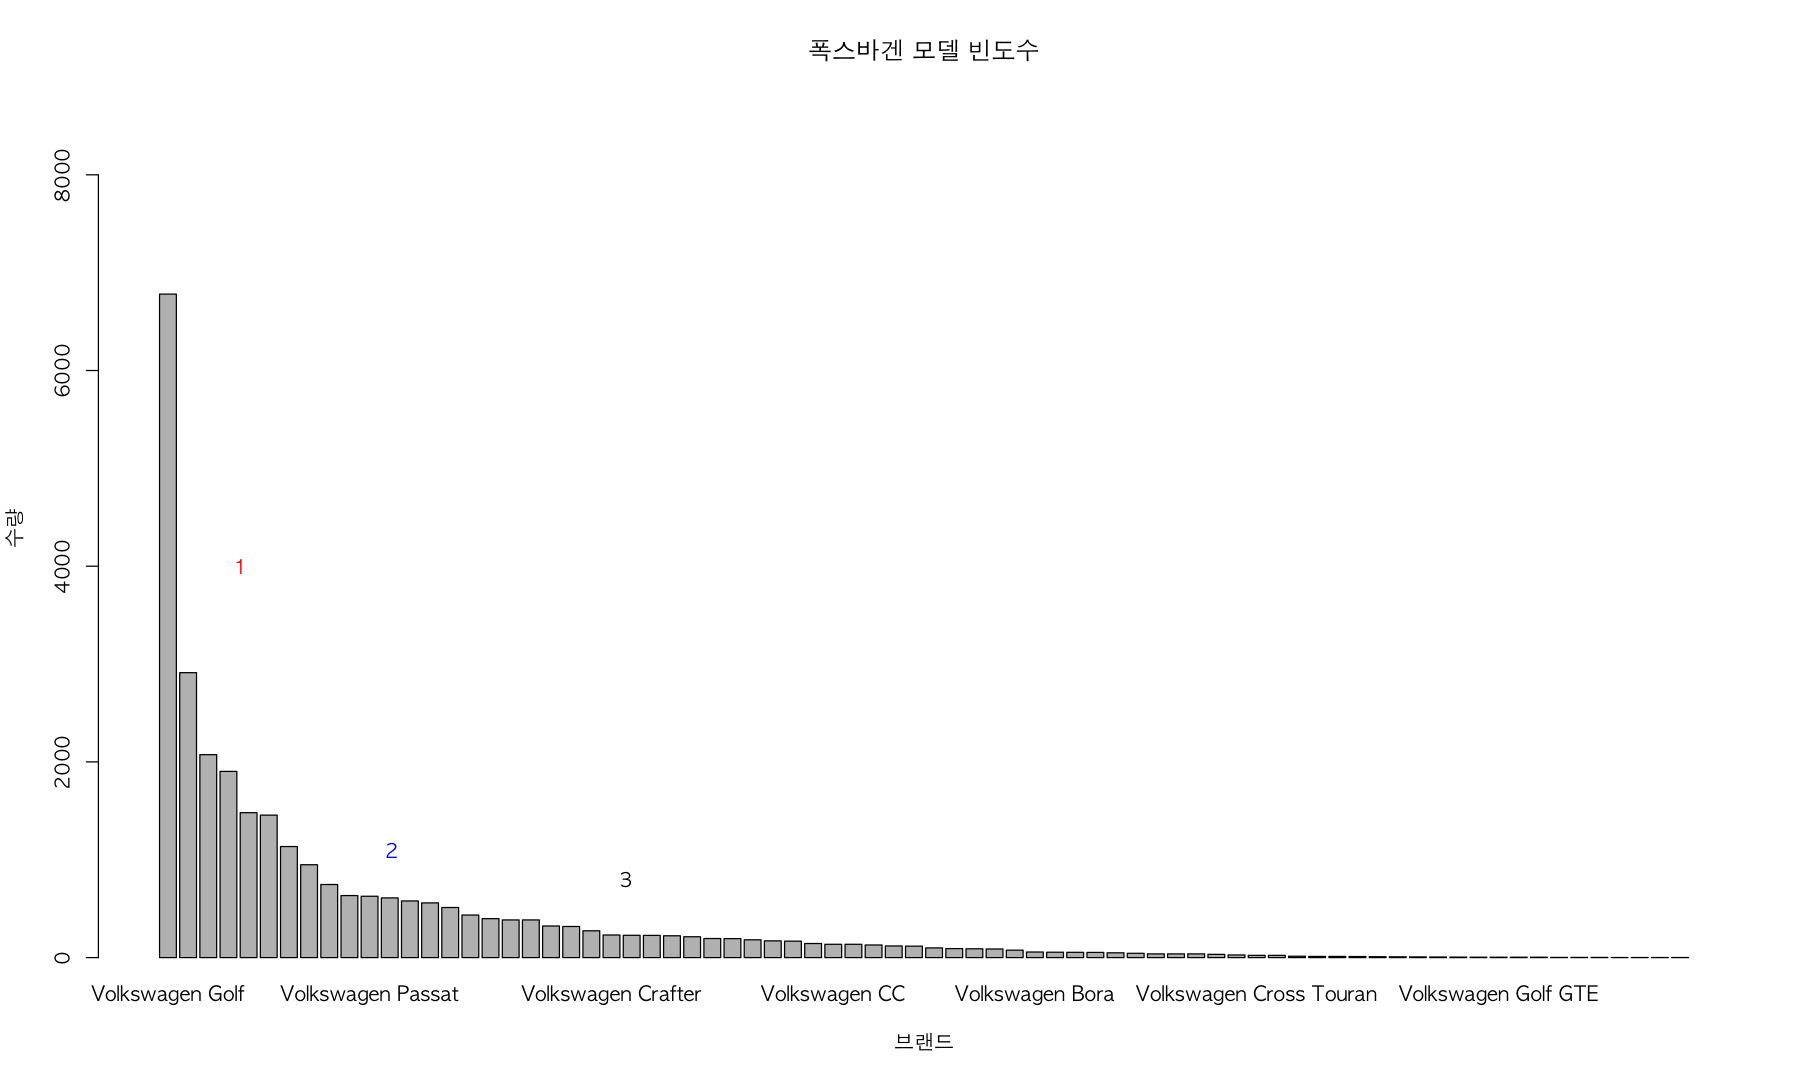

In [579]:

options(scipen = 100)
par(family = "AppleGothic", bg = 'white')
barplot(sort(table(wagen$model),decreasing = T),
main = "폭스바겐 모델 빈도수",
xlab = '브랜드',
ylab = '수량',
ylim = c(0,max(table(wagen$model)) +2000),
#col = rep('red',3)
)
text(5,4000, "1" ,col = 'red')
text(14,1100, "2",col = 'blue')
text(28,800, "3",col = 'black')

In [525]:
head(wagen)
sort(table(wagen$model))

 # Volkswagen Polo             Volkswagen Golf 
 # 2912                        6781
 # Volkswagen Tiguan 
 # 2074

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
213637,volkswagen,Volkswagen T4,beige,1995,6500,110,Manual,Petrol,13.5,290000
213645,volkswagen,Volkswagen Golf,blue,1995,4970,90,Manual,Petrol,8,159243
213646,volkswagen,Volkswagen Golf,blue,1995,2590,90,Automatic,Petrol,6.8,141600
213647,volkswagen,Volkswagen Passat Variant,blue,1995,800,90,Manual,Petrol,8.8,346000
213648,volkswagen,Volkswagen Golf,blue,1995,8900,174,Automatic,Petrol,10.5,162640
213649,volkswagen,Volkswagen Corrado,blue,1995,9900,116,Manual,Petrol,5.7,116000



         Volkswagen Corrado            Volkswagen Käfer 
                          1                           1 
      Volkswagen Polo Sedan     Volkswagen Polo Variant 
                          1                           1 
             Volkswagen Bus       Volkswagen T5 Shuttle 
                          2                           2 
           Volkswagen Vento       Volkswagen Cross Golf 
                          2                           4 
        Volkswagen Golf GTE       Volkswagen Polo R WRC 
                          4                           4 
      Volkswagen T4 Allstar         Volkswagen Golf GTD 
                          4                           5 
     Volkswagen Transporter         Volkswagen T4 Kombi 
                          6                           7 
              Volkswagen LT Volkswagen Grand California 
                          8                           9 
      Volkswagen T6.1 Kombi    Volkswagen T4 California 
                         11   

In [575]:
wagen$transmission_type <- ifelse(wagen$transmission_type =='Manual',1,0)
wagen$fuel_type <- ifelse(wagen$fuel_type =='Petrol',1,0)

In [587]:
golf <- subset(wagen,wagen$model =='Volkswagen Golf')
tiguan <- subset(wagen,wagen$model =='Volkswagen Tiguan')
polo <- subset(wagen,wagen$model =='Volkswagen Polo')

In [588]:
head(golf)


,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
213645,volkswagen,Volkswagen Golf,blue,1995,4970,90,1,1,8,159243
213646,volkswagen,Volkswagen Golf,blue,1995,2590,90,0,1,6.8,141600
213648,volkswagen,Volkswagen Golf,blue,1995,8900,174,0,1,10.5,162640
213651,volkswagen,Volkswagen Golf,blue,1995,6399,60,1,1,6.8,52523
213663,volkswagen,Volkswagen Golf,red,1995,6600,90,1,0,5,159450
213671,volkswagen,Volkswagen Golf,red,1995,2799,75,1,1,7.2,99700


### 분류한 모델 3개에 각각  색깔 150 개 이하 제거

In [594]:

golf <- golf[golf$color != 'yellow', ]
table(golf$color)


 black   blue   grey    red silver  white 
  1623   1330   1081    547   1330    640 

In [601]:

tiguan <- tiguan[tiguan$color != 'red', ]
table(tiguan$color)


 black   blue   grey silver  white 
   485    205    391    293    297 

In [608]:
polo <- polo[polo$color != 'orange', ]
table(polo$color)


 black   blue   grey    red silver  white 
   706    459    323    420    554    251 

In [607]:
head(golf)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
213645,volkswagen,Volkswagen Golf,blue,1995,4970,90,1,1,8,159243
213646,volkswagen,Volkswagen Golf,blue,1995,2590,90,0,1,6.8,141600
213648,volkswagen,Volkswagen Golf,blue,1995,8900,174,0,1,10.5,162640
213651,volkswagen,Volkswagen Golf,blue,1995,6399,60,1,1,6.8,52523
213663,volkswagen,Volkswagen Golf,red,1995,6600,90,1,0,5,159450
213671,volkswagen,Volkswagen Golf,red,1995,2799,75,1,1,7.2,99700


### One Hot Incoding 
- 색깔을 수치화하고 크기의 관계가 없음으로 적용 

In [609]:
golf$color_blue <- ifelse(golf$color == "blue", 1, 0)
golf$color_silver <- ifelse(golf$color == 'silver',1,0 )
golf$color_red <- ifelse(golf$color == 'red',1,0)
golf$color_grey <- ifelse(golf$color == 'grey',1,0 )
golf$color_black <- ifelse(golf$color == 'black',1,0 )
golf$color_white <- ifelse(golf$color == 'white',1,0 )

In [612]:
polo$color_blue <- ifelse(polo$color == "blue", 1, 0)
polo$color_silver <- ifelse(polo$color == 'silver',1,0 )
polo$color_red <- ifelse(polo$color == 'red',1,0)
polo$color_grey <- ifelse(polo$color == 'grey',1,0 )
polo$color_black <- ifelse(polo$color == 'black',1,0 )
polo$color_white <- ifelse(polo$color == 'white',1,0 )

In [611]:
tiguan$color_blue <- ifelse(tiguan$color == "blue", 1, 0)
tiguan$color_silver <- ifelse(tiguan$color == 'silver',1,0 )
tiguan$color_red <- ifelse(tiguan$color == 'red',1,0)
tiguan$color_grey <- ifelse(tiguan$color == 'grey',1,0 )
tiguan$color_black <- ifelse(tiguan$color == 'black',1,0 )
tiguan$color_white <- ifelse(tiguan$color == 'white',1,0 )

## 마지막 컬럼 정제
- 브랜드와 모델은 csv 를 나누었기 때문에 제거, 컬러는 One Hot Incoding 을 실시했음으로 제거 

In [622]:
tiguan$year <- as.numeric(tiguan$year)
tiguan$price_in_euro <- as.numeric(tiguan$price_in_euro)
tiguan$power_ps <- as.numeric(tiguan$power_ps)
tiguan$fuel_consumption_l_100km <- as.numeric(tiguan$fuel_consumption_l_100km)

In [623]:
 #tiguan<- tiguan[,-c(1,2,3)]
head(tiguan)

,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_blue,color_silver,color_red,color_grey,color_black,color_white
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
217646,2007,13999,140,1,0,7.2,42000,1,0,0,0,0,0
218108,2007,8890,150,1,1,8.4,134780,0,0,0,0,1,0
218127,2007,7999,140,0,0,7.1,196567,0,0,0,0,1,0
218406,2008,4500,150,1,1,8.0,168000,1,0,0,0,0,0
218420,2008,9500,150,1,1,8.0,83000,1,0,0,0,0,0
218429,2008,7700,170,1,1,8.9,183123,1,0,0,0,0,0


In [619]:
golf$year <- as.numeric(golf$year)
golf$price_in_euro <- as.numeric(golf$price_in_euro)
golf$power_ps <- as.numeric(golf$power_ps)
golf$fuel_consumption_l_100km <- as.numeric(golf$fuel_consumption_l_100km)

In [621]:
 #golf<- golf[,-c(1,2,3)]
head(golf)

,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_blue,color_silver,color_red,color_grey,color_black,color_white
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
213645,1995,4970,90,1,1,8.0,159243,1,0,0,0,0,0
213646,1995,2590,90,0,1,6.8,141600,1,0,0,0,0,0
213648,1995,8900,174,0,1,10.5,162640,1,0,0,0,0,0
213651,1995,6399,60,1,1,6.8,52523,1,0,0,0,0,0
213663,1995,6600,90,1,0,5.0,159450,0,0,1,0,0,0
213671,1995,2799,75,1,1,7.2,99700,0,0,1,0,0,0


In [617]:
polo$year <- as.numeric(polo$year)
polo$price_in_euro <- as.numeric(polo$price_in_euro)
polo$power_ps <- as.numeric(polo$power_ps)
polo$fuel_consumption_l_100km <- as.numeric(polo$fuel_consumption_l_100km)

In [618]:
 #polo<- polo[,-c(1,2,3)]
head(polo)

,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_blue,color_silver,color_red,color_grey,color_black,color_white
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
213679,1996,3990,60,1,1,6.3,27500,1,0,0,0,0,0
213685,1996,299,60,1,1,6.3,202387,1,0,0,0,0,0
213698,1996,1250,60,1,1,6.5,182500,1,0,0,0,0,0
213716,1996,1400,60,1,1,6.3,257000,0,0,1,0,0,0
213733,1997,1500,60,1,1,6.3,162730,1,0,0,0,0,0
213741,1997,555,75,1,1,6.9,267293,1,0,0,0,0,0


In [ ]:
polo
golf
tiguan

In [438]:
wagen <- na.omit(wagen)
table(is.na(wagen))



 FALSE 
496005 

In [3]:
mycar <- read.csv("./file/mycar(priceOK).csv")

In [4]:
head(mycar)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,246915,volvo,Volvo 850,blue,09/1995,1995,700,106,144,Manual,Petrol,,- (g/km),367462,850 2.5-10V
2,246916,volvo,Volvo 850,blue,06/1995,1995,3590,106,144,Automatic,Petrol,,- (g/km),280000,2.5-10V
3,246917,volvo,Volvo V70,blue,05/1997,1997,1450,132,179,Manual,Petrol,10 l/100 km,237 g/km,286460,2.0 T
4,246918,volvo,Volvo V70,blue,11/1997,1997,650,93,126,Manual,Petrol,10 l/100 km,- (g/km),340000,V70 2.0 - BENZIN / LPG
5,246919,volvo,Volvo V70,blue,09/1997,1997,499,106,144,Manual,Petrol,- (l/100 km),- (g/km),430942,2.5i Klimaautomatik Sitzheizung AHK
6,246920,volvo,Volvo 940,blue,11/1997,1997,2999,99,135,Automatic,Petrol,,- (g/km),317266,Classic Automatik Klima !!!


## 내가 할 포드와 토요타만 뽑기

In [6]:
fordtoyo <- subset(mycar, brand == 'ford' | brand =='toyota')

In [7]:
nrow(fordtoyo)

[1] 26970

In [8]:
head(fordtoyo)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
4164,205406,toyota,Toyota RAV 4,blue,04/1995,1995,4500,94,128,Manual,Petrol,"9,5 l/100 km",223 g/km,155961,"TÜV neu, sehr guter Zustand, Inspektion. neu"
4165,205407,toyota,Toyota Corolla,blue,10/1995,1995,2390,55,75,Manual,Petrol,,- (g/km),150000,1.4 Compact XL *1. Hand*Tüv09.2024*
4166,205408,toyota,Toyota Corolla,blue,11/1995,1995,3380,55,75,Automatic,Petrol,,- (g/km),55178,"Compact 1.4 Automatik, SR+WR,"
4167,205409,toyota,Toyota Corolla,blue,08/1995,1995,1950,55,75,Manual,Petrol,7 l/100 km,165 g/km,110000,1.4 XLi
4168,205410,toyota,Toyota Corolla,red,05/1995,1995,1999,65,88,Manual,Petrol,"5,3 l/100 km",- (g/km),113131,Corolla 1.4 XLi Hit Mod. 95
4169,205411,toyota,Toyota RAV 4,red,09/1995,1995,7300,94,128,Automatic,Petrol,"9,6 l/100 km",- (g/km),120000,2.0 4x4Allrad + Klima + Rostfrei + Automatik


## 사용할 오토와 메뉴얼만 남기기

In [14]:
fordtoyo <- fordtoyo[fordtoyo$transmission_type != 'Semi-automatic', ]
table(fordtoyo$transmission_type)


Automatic    Manual 
    11438     15332 

## 연료는 디젤과 페트롤만

In [24]:
fordtoyo <- fordtoyo[fordtoyo$fuel_type != 'Hybrid', ]
table(fordtoyo$fuel_type)


Diesel Petrol 
  8177  12972 

In [25]:
nrow(fordtoyo)

[1] 21149

In [26]:
head(fordtoyo)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
4164,205406,toyota,Toyota RAV 4,blue,04/1995,1995,4500,94,128,Manual,Petrol,"9,5 l/100 km",223 g/km,155961,"TÜV neu, sehr guter Zustand, Inspektion. neu"
4165,205407,toyota,Toyota Corolla,blue,10/1995,1995,2390,55,75,Manual,Petrol,,- (g/km),150000,1.4 Compact XL *1. Hand*Tüv09.2024*
4166,205408,toyota,Toyota Corolla,blue,11/1995,1995,3380,55,75,Automatic,Petrol,,- (g/km),55178,"Compact 1.4 Automatik, SR+WR,"
4167,205409,toyota,Toyota Corolla,blue,08/1995,1995,1950,55,75,Manual,Petrol,7 l/100 km,165 g/km,110000,1.4 XLi
4168,205410,toyota,Toyota Corolla,red,05/1995,1995,1999,65,88,Manual,Petrol,"5,3 l/100 km",- (g/km),113131,Corolla 1.4 XLi Hit Mod. 95
4169,205411,toyota,Toyota RAV 4,red,09/1995,1995,7300,94,128,Automatic,Petrol,"9,6 l/100 km",- (g/km),120000,2.0 4x4Allrad + Klima + Rostfrei + Automatik


## 150개 이하인 색상 제거

In [34]:
table(fordtoyo$color)


 beige  black   blue  brown  green   grey orange    red silver violet  white 
   209   3595   2847    296    286   3434    281   2220   3860     31   3836 
yellow 
   138 

In [37]:
fordtoyo <- fordtoyo[fordtoyo$color != 'yellow' ,]
table(fordtoyo$color)


 beige  black   blue  brown  green   grey orange    red silver  white 
   209   3595   2847    296    286   3434    281   2220   3860   3836 

In [38]:
head(fordtoyo)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
4164,205406,toyota,Toyota RAV 4,blue,04/1995,1995,4500,94,128,Manual,Petrol,"9,5 l/100 km",223 g/km,155961,"TÜV neu, sehr guter Zustand, Inspektion. neu"
4165,205407,toyota,Toyota Corolla,blue,10/1995,1995,2390,55,75,Manual,Petrol,,- (g/km),150000,1.4 Compact XL *1. Hand*Tüv09.2024*
4166,205408,toyota,Toyota Corolla,blue,11/1995,1995,3380,55,75,Automatic,Petrol,,- (g/km),55178,"Compact 1.4 Automatik, SR+WR,"
4167,205409,toyota,Toyota Corolla,blue,08/1995,1995,1950,55,75,Manual,Petrol,7 l/100 km,165 g/km,110000,1.4 XLi
4168,205410,toyota,Toyota Corolla,red,05/1995,1995,1999,65,88,Manual,Petrol,"5,3 l/100 km",- (g/km),113131,Corolla 1.4 XLi Hit Mod. 95
4169,205411,toyota,Toyota RAV 4,red,09/1995,1995,7300,94,128,Automatic,Petrol,"9,6 l/100 km",- (g/km),120000,2.0 4x4Allrad + Klima + Rostfrei + Automatik


In [52]:
table(fordtoyo$fuel_consumption_g_km)


         - (g/km)               -/-            0 g/km            1 g/km 
             2935               128               401                 4 
       1.020 g/km        1.100 g/km        1.150 g/km          100 g/km 
                2                 1                 1                21 
         101 g/km          102 g/km          103 g/km          104 g/km 
              120                92                29               135 
         105 g/km          106 g/km          107 g/km          108 g/km 
              175                62               172               134 
         109 g/km          110 g/km          111 g/km          112 g/km 
              249               240               148               177 
         113 g/km          114 g/km          115 g/km          116 g/km 
              108               757               205               220 
         117 g/km          118 g/km          119 g/km          120 g/km 
              251               110               

In [43]:
table(fordtoyo$fuel_consumption_l_100km)


                 - (l/100 km)     0 l/100 km   0,6 l/100 km     1 l/100 km 
          1881            125              4              1              2 
  1,2 l/100 km   1,3 l/100 km   1,4 l/100 km    10 l/100 km  10,1 l/100 km 
             6              1              4             12             10 
 10,2 l/100 km  10,3 l/100 km  10,4 l/100 km  10,5 l/100 km  10,6 l/100 km 
             8              3             13              5              8 
 10,7 l/100 km  10,8 l/100 km  10,9 l/100 km    11 l/100 km  11,1 l/100 km 
             6              2              2              4              1 
 11,2 l/100 km  11,3 l/100 km  11,5 l/100 km  11,6 l/100 km  11,7 l/100 km 
             4              4              8              1              3 
 11,8 l/100 km   119 l/100 km    12 l/100 km  12,1 l/100 km  12,2 l/100 km 
            32              1            100             31             28 
 12,4 l/100 km  12,5 l/100 km  12,6 l/100 km  12,8 l/100 km  12,9 l/100 km 
           

In [49]:

#99,9 l/100 km
subset(fordtoyo, fuel_consumption_l_100km == '99,9 l/100 km')

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
105411,69808,ford,Ford Focus,red,11/2019,2019,17990,88,120,Automatic,Diesel,"99,9 l/100 km",112 g/km,75353,Active 1.5 EcoBlue AT LED Navi Kam Pano


In [51]:
fordtoyo <- fordtoyo[fordtoyo$fuel_consumption_l_100km != '99,9 l/100 km' ,]


In [59]:
fordtoyo <- fordtoyo[fordtoyo$fuel_consumption_l_100km != '0 l/100 km' ,]
table(fordtoyo$fuel_consumption_l_100km)
nrow(fordtoyo)


  0,6 l/100 km     1 l/100 km   1,2 l/100 km   1,3 l/100 km   1,4 l/100 km 
             1              2              6              1              4 
   10 l/100 km  10,1 l/100 km  10,2 l/100 km  10,3 l/100 km  10,4 l/100 km 
            12             10              8              3             13 
 10,5 l/100 km  10,6 l/100 km  10,7 l/100 km  10,8 l/100 km  10,9 l/100 km 
             5              8              6              2              2 
   11 l/100 km  11,1 l/100 km  11,2 l/100 km  11,3 l/100 km  11,5 l/100 km 
             4              1              4              4              8 
 11,6 l/100 km  11,7 l/100 km  11,8 l/100 km   119 l/100 km    12 l/100 km 
             1              3             32              1            100 
 12,1 l/100 km  12,2 l/100 km  12,4 l/100 km  12,5 l/100 km  12,6 l/100 km 
            31             28             35             29             14 
 12,8 l/100 km  12,9 l/100 km    13 l/100 km  13,1 l/100 km  13,3 l/100 km 
           

[1] 18853

In [ ]:
subset(fordtoyo, model =)

In [42]:
table(fordtoyo$model)

#Ford Focus 3749
#Ford Fiesta 2609
#Ford Mondeo 1021
#Toyota Proace 361
#Toyota Yaris 731
#Toyota Aygo 518


                Ford           Ford B-Max          Ford Bronco 
                 121                  271                   14 
          Ford C-Max         Ford Courier           Ford Crown 
                 546                    3                    1 
       Ford EcoSport            Ford Edge          Ford Escort 
                 780                  304                    4 
     Ford Expedition        Ford Explorer           Ford F 150 
                   2                   11                   61 
          Ford F 250           Ford F 350          Ford Fiesta 
                   8                    2                 2609 
           Ford Flex           Ford Focus     Ford Focus C-Max 
                   1                 3749                   68 
       Ford Focus CC          Ford Fusion          Ford Galaxy 
                  18                  142                  278 
    Ford Gran Torino     Ford Grand C-Max   Ford Grand Tourneo 
                   2                  2

In [113]:
#Ford Focus
Ford_Focus <- subset(fordtoyo, model == 'Ford Focus')

In [114]:
head(Ford_Focus)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
93238,57628,ford,Ford Focus,blue,01/2001,2001,1500,55,75,Manual,Petrol,"6,6 l/100 km",158 g/km,287000,Turnier
93239,57629,ford,Ford Focus,blue,05/2001,2001,1000,74,101,Manual,Petrol,7 l/100 km,167 g/km,160000,Turnier TDCi Futura 2
93240,57630,ford,Ford Focus,blue,04/2001,2001,2750,74,101,Manual,Petrol,7 l/100 km,167 g/km,160000,Ghia
93249,57639,ford,Ford Focus,blue,03/2001,2001,600,74,101,Manual,Petrol,7 l/100 km,166 g/km,145000,Trend Turnier (CAK)
93250,57640,ford,Ford Focus,blue,11/2001,2001,600,74,101,Manual,Petrol,"6,8 l/100 km",- (g/km),226000,Focus Turnier
93253,57643,ford,Ford Focus,blue,04/2001,2001,3000,74,101,Manual,Petrol,"7,3 l/100 km",174 g/km,83791,Trend Lim. (CAK)


In [115]:
Ford_Focus[12]
table(Ford_Focus[12])

,fuel_consumption_l_100km
,<chr>
93238,"6,6 l/100 km"
93239,7 l/100 km
93240,7 l/100 km
93249,7 l/100 km
93250,"6,8 l/100 km"
93253,"7,3 l/100 km"
93254,7 l/100 km
93255,"6,6 l/100 km"
93261,7 l/100 km


fuel_consumption_l_100km
 0,6 l/100 km   10 l/100 km 10,1 l/100 km  3,4 l/100 km  3,5 l/100 km 
            1             1             1            26            37 
 3,6 l/100 km  3,7 l/100 km  3,8 l/100 km  3,9 l/100 km    4 l/100 km 
           39            47           218             8            53 
 4,1 l/100 km  4,2 l/100 km  4,3 l/100 km  4,4 l/100 km  4,5 l/100 km 
           57           196            42           118            87 
 4,6 l/100 km  4,7 l/100 km  4,8 l/100 km  4,9 l/100 km    5 l/100 km 
           39           115           353            69            81 
 5,1 l/100 km  5,2 l/100 km  5,3 l/100 km  5,4 l/100 km  5,5 l/100 km 
          140            69            92            64           151 
 5,6 l/100 km  5,7 l/100 km  5,8 l/100 km  5,9 l/100 km    6 l/100 km 
          125            18            42           141            74 
 6,1 l/100 km  6,2 l/100 km  6,3 l/100 km  6,4 l/100 km  6,5 l/100 km 
           80            10            37           

In [116]:
Ford_Focus$fuel_consumption_l_100km  <- gsub(" l/100 km", "", fuel)

In [117]:
head(Ford_Focus) 

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
93238,57628,ford,Ford Focus,blue,01/2001,2001,1500,55,75,Manual,Petrol,"6,6",158 g/km,287000,Turnier
93239,57629,ford,Ford Focus,blue,05/2001,2001,1000,74,101,Manual,Petrol,7,167 g/km,160000,Turnier TDCi Futura 2
93240,57630,ford,Ford Focus,blue,04/2001,2001,2750,74,101,Manual,Petrol,7,167 g/km,160000,Ghia
93249,57639,ford,Ford Focus,blue,03/2001,2001,600,74,101,Manual,Petrol,7,166 g/km,145000,Trend Turnier (CAK)
93250,57640,ford,Ford Focus,blue,11/2001,2001,600,74,101,Manual,Petrol,"6,8",- (g/km),226000,Focus Turnier
93253,57643,ford,Ford Focus,blue,04/2001,2001,3000,74,101,Manual,Petrol,"7,3",174 g/km,83791,Trend Lim. (CAK)


In [118]:
Ford_Focus[12]

,fuel_consumption_l_100km
,<chr>
93238,"6,6"
93239,7
93240,7
93249,7
93250,"6,8"
93253,"7,3"
93254,7
93255,"6,6"
93261,7


In [119]:
head(Ford_Focus)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
93238,57628,ford,Ford Focus,blue,01/2001,2001,1500,55,75,Manual,Petrol,"6,6",158 g/km,287000,Turnier
93239,57629,ford,Ford Focus,blue,05/2001,2001,1000,74,101,Manual,Petrol,7,167 g/km,160000,Turnier TDCi Futura 2
93240,57630,ford,Ford Focus,blue,04/2001,2001,2750,74,101,Manual,Petrol,7,167 g/km,160000,Ghia
93249,57639,ford,Ford Focus,blue,03/2001,2001,600,74,101,Manual,Petrol,7,166 g/km,145000,Trend Turnier (CAK)
93250,57640,ford,Ford Focus,blue,11/2001,2001,600,74,101,Manual,Petrol,"6,8",- (g/km),226000,Focus Turnier
93253,57643,ford,Ford Focus,blue,04/2001,2001,3000,74,101,Manual,Petrol,"7,3",174 g/km,83791,Trend Lim. (CAK)


In [120]:
Ford_Focus$fuel_consumption_l_100km  <- gsub(" l/100 km", "", fuel)

In [121]:
head(Ford_Focus)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
93238,57628,ford,Ford Focus,blue,01/2001,2001,1500,55,75,Manual,Petrol,"6,6",158 g/km,287000,Turnier
93239,57629,ford,Ford Focus,blue,05/2001,2001,1000,74,101,Manual,Petrol,7,167 g/km,160000,Turnier TDCi Futura 2
93240,57630,ford,Ford Focus,blue,04/2001,2001,2750,74,101,Manual,Petrol,7,167 g/km,160000,Ghia
93249,57639,ford,Ford Focus,blue,03/2001,2001,600,74,101,Manual,Petrol,7,166 g/km,145000,Trend Turnier (CAK)
93250,57640,ford,Ford Focus,blue,11/2001,2001,600,74,101,Manual,Petrol,"6,8",- (g/km),226000,Focus Turnier
93253,57643,ford,Ford Focus,blue,04/2001,2001,3000,74,101,Manual,Petrol,"7,3",174 g/km,83791,Trend Lim. (CAK)


In [122]:
#Ford_Focus[12]
 Ford_Focus$fuel_consumption_l_100km <- str_replace_all(Ford_Focus$fuel_consumption_l_100km, "[,.]", ".")

In [123]:
head(Ford_Focus)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
93238,57628,ford,Ford Focus,blue,01/2001,2001,1500,55,75,Manual,Petrol,6.6,158 g/km,287000,Turnier
93239,57629,ford,Ford Focus,blue,05/2001,2001,1000,74,101,Manual,Petrol,7,167 g/km,160000,Turnier TDCi Futura 2
93240,57630,ford,Ford Focus,blue,04/2001,2001,2750,74,101,Manual,Petrol,7,167 g/km,160000,Ghia
93249,57639,ford,Ford Focus,blue,03/2001,2001,600,74,101,Manual,Petrol,7,166 g/km,145000,Trend Turnier (CAK)
93250,57640,ford,Ford Focus,blue,11/2001,2001,600,74,101,Manual,Petrol,6.8,- (g/km),226000,Focus Turnier
93253,57643,ford,Ford Focus,blue,04/2001,2001,3000,74,101,Manual,Petrol,7.3,174 g/km,83791,Trend Lim. (CAK)


In [124]:
as.integer(Ford_Focus$fuel_consumption_l_100km)

[1]  6  7  7  7  6  7  7  6  7  6  6  7  7  7  7  7  6  6  7  6  7  5  6  6
  [25]  6  6  6  7  5  8  8  6  7  6  6  6  5 10  7  5  6  6  8  7  5  7  7  7
  [49]  6  7  6  6  7  7  6  6  6  7  7  6  7  5  5  6  5  6  5  5  5  6  6  6
  [73]  7  6  7  6  5  6  7  6  6  9  6  7  7  6  7  5  8  6  6  7  7  6  6  7
  [97]  6  7  6  7  6  7  7  8  7  7  6  6  6  6  7  6  6  6  4  6  7  4  6  6
 [121]  4  6  6  6  6  6  7  6  6  4  6  6  7  6  5  6  6  6  6  5  4  6  6  6
 [145]  6  7  6  6  6  4  6  6  4  6  8  7  7  6  6  6  7  4  5  6  6  6  6  6
 [169]  6  6  4  6  4  6  6  6  6  4  6  4  6  5  6  9  8  6  6  6  6  6  7  6
 [193]  6  6  6  6  6  4  6  6  7  6  7  9  4  4  6  6  6  5  7  4  6  7  6  6
 [217]  5  9  6  6  8  6  6  6  6  6  6  7  6  6  6  6  5  7  7  6  5  6  5  6
 [241]  7  6  6  5  7  4  6  6  6  5  4  5  6  6  5  6  6  4  6  6  6  6  7  6
 [265]  6  4  6  7  6  6  6  5  4  6  5  6  7  6 10  7  4  4  4  7  7  4  4  6
 [289]  6  6  4  4  6  6  6  6  4  6  4  5  4  4  6  6  6  7  4  6  5  7  6  6
 [313]  6  6  7  6  4  6  6  6  7  6  4  4  4  6  5  5  7  4  6  6  4  7  4  6
 [337]  6  5  6  5  6  7  7  6  6  6  6  7  7  5  6  7  9  5  7  7  7  6  7  4
 [361]  6  6  6  7  6  6  4  7  6  6  6  4  4  5  7  6  6  6  6  7  6  6  6  6
 [385]  6  4  6  4  6  6  9  9  4  6  6  6  7  4  7  6  6  6  6  5  7  6  7  6
 [409]  6  7  5  7  6  6  6  6  7  7  4  6  7  6  4  4  7  6  6  6  6  4  6  6
 [433]  7  6  6  6  7  6  6  4  6  6  7  7  4  7  6  6  6  6  7  6  6  4  6  5
 [457]  4  7  6  6  6  7  4  9  6  4  4  4  4  4  7  6  4  9  6  8  4  4  4  6
 [481]  4  4  5  4  4  6  6  6  4  6  4  6  6  4  9  4  6  7  4  5  4  7  6  4
 [505]  4  7  6  6  4  4  6  6  6  5  7  6  4  4  6  6  6  6  4  7  6  6  4  6
 [529]  6  6  7  6  4  6  4  6  6  7  6  7  4  4  7  9  9  9  6  6  5  4  9  9
 [553]  6  4  4  6  6  4  6  4  6  6  5  4  5  4  4  6  6  4  6  6  6  4  5  4
 [577]  6  5  4  6  4  4  6  6  5  4  6  5  6  6  6  5  6  7  5  6  5  4  6  5
 [601]  4  6  6  5  6  6  6  4  6  4  4  4  6  5  6  6 66  4  6  4  5  6  5  4
 [625]  6  5  5  5  4  4  4  5  4  4  4  5  4  6  5  4  4  4  5  6  4  6  5  4
 [649]  4  4  7  5  5  5  4  5  6  6  5  5  4  6  6  5  5  7  4  4  5  6  4  5
 [673]  5  4  4  6  4  4  4  7  5  6  4  5  6  6  6  4  5  4  5  4  5  5  5  4
 [697]  6  4  4  4  4  4  6  4  4  4  5  4  6  6  4  4  5  6  4  4  7  7  7  5
 [721]  5  4  3  7  5  5  4  5  7  5  5  7  5  4  5  4  4  4  4  5  4  6  4  5
 [745]  7  5  4  5  5  5  5  5  5  6  4  4  4  5  5  4  4  5  4  4  4  5  5  5
 [769]  5  4  6  5  4  3  7  5  4  4  5  7  5  4  5  5  4  5  5  5  5  5  4  6
 [793]  4  4  5  7  7  4  5  7  5  4  7  5  4  5  5  5  5  5  5  5  6  4  5  4
 [817]  4  5  4  5  5  3  4  5  4  4  5  4  4  4  4  4  4  4  4  4  4  5  4  5
 [841]  4  5  5  4  4  4  5  4  4  7  4  5  5  4  4  5  6  4  5  4  7  5  4  7
 [865]  4  4  4  4  5  4  3  4  4  5  5  4  5  6  4  4  4  4  4  7  4  4  7  3
 [889]  4  5  4  4  5  4  5  5  4  5  4  4  4  4  4  4  5  5  4  4  5  5  4  4
 [913]  5  4  5  4  5  5  5  5  4  3  5  4  5  3  3  4  4  5  5  4  4  4  4  5
 [937]  5  5  4  4  5  4  4  7  5  5  4  5  5  5  5  4  5  7  5  5  4  5  6  4
 [961]  7  7  5  6  5  5  4  5  5  4  5  4  5  5  7  7  4  5  4  5  5  7  5  5
 [985]  5  4  6  5  5  5  3  4  3  4  4  4  7  5  4  4  5  4  4  5  4  4  4  6
[1009]  4  5  4  5  5  5  5  5  3  4  6  5  6  4  5  4  5  4  6  4  5  5  4  5
[1033]  7  7  6  5  6  7  6  5  5  5  4  5  6  5  5  4  5  4  4  4  4  4  4  5
[1057]  6  5  4  3  4  4  3  3  6  3  4  3  5  4  4  4  6  5  6  6  3  3  4  4
[1081]  6  3  4  4  5  3  5  4  4  6  6  3  4  3  3  5  7  6  5  4  6  4  6  6
[1105]  5  6  6  3  6  3  3  4  4  5  4  5  5  4  5  4  4  4  3  3  5  4  4  5
[1129]  4  5  3  4  4  4  4  5  6  6  4  5  6  4  4  3  4  4  4  5  5  4  6  4
[1153]  5  4  4  3  4  4  4  3  5  6  5  6  4  5  4  5  4  4  4  4  4  6  3  3
[1177]  6  4  4  4  4  4  4  5  4  5  5  4  6  4  4  4  6  4  5  6  6  6  4  4
[1201]  3  4  6  4  4  6  3  4  6  3  4  4  4  4  4  

In [125]:
head(Ford_Focus)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
93238,57628,ford,Ford Focus,blue,01/2001,2001,1500,55,75,Manual,Petrol,6.6,158 g/km,287000,Turnier
93239,57629,ford,Ford Focus,blue,05/2001,2001,1000,74,101,Manual,Petrol,7,167 g/km,160000,Turnier TDCi Futura 2
93240,57630,ford,Ford Focus,blue,04/2001,2001,2750,74,101,Manual,Petrol,7,167 g/km,160000,Ghia
93249,57639,ford,Ford Focus,blue,03/2001,2001,600,74,101,Manual,Petrol,7,166 g/km,145000,Trend Turnier (CAK)
93250,57640,ford,Ford Focus,blue,11/2001,2001,600,74,101,Manual,Petrol,6.8,- (g/km),226000,Focus Turnier
93253,57643,ford,Ford Focus,blue,04/2001,2001,3000,74,101,Manual,Petrol,7.3,174 g/km,83791,Trend Lim. (CAK)


In [126]:
Ford_Focus <- Ford_Focus[,-c(1,5,13,15)]

In [127]:
head(Ford_Focus)

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
93238,ford,Ford Focus,blue,2001,1500,55,75,Manual,Petrol,6.6,287000
93239,ford,Ford Focus,blue,2001,1000,74,101,Manual,Petrol,7,160000
93240,ford,Ford Focus,blue,2001,2750,74,101,Manual,Petrol,7,160000
93249,ford,Ford Focus,blue,2001,600,74,101,Manual,Petrol,7,145000
93250,ford,Ford Focus,blue,2001,600,74,101,Manual,Petrol,6.8,226000
93253,ford,Ford Focus,blue,2001,3000,74,101,Manual,Petrol,7.3,83791


In [128]:
table(Ford_Focus$fuel_consumption_l_100km)


 0.6   10 10.1  3.4  3.5  3.6  3.7  3.8  3.9    4  4.1  4.2  4.3  4.4  4.5  4.6 
   1    1    1   26   37   39   47  218    8   53   57  196   42  118   87   39 
 4.7  4.8  4.9    5  5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9    6  6.1  6.2 
 115  353   69   81  140   69   92   64  151  125   18   42  141   74   80   10 
 6.3  6.4  6.5  6.6  6.7  6.8  6.9   66    7  7.1  7.2  7.3  7.4  7.5  7.6  7.7 
  37   43   10   86  144   99   14    1   38   21   38   17    1   15    7   57 
 7.8  7.9    8  8.1  8.2  8.3  8.4  8.7    9  9.3  9.4 
   3   83   26    2   24   11    4    1    1    8    7 

In [129]:
Ford_Focus$fuel_consumption_l_100km <- as.double(Ford_Focus$fuel_consumption_l_100km)

In [110]:
head(Ford_Focus)

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
93238,ford,Ford Focus,blue,2001,1500,55,75,Manual,Petrol,66,287000
93239,ford,Ford Focus,blue,2001,1000,74,101,Manual,Petrol,7,160000
93240,ford,Ford Focus,blue,2001,2750,74,101,Manual,Petrol,7,160000
93249,ford,Ford Focus,blue,2001,600,74,101,Manual,Petrol,7,145000
93250,ford,Ford Focus,blue,2001,600,74,101,Manual,Petrol,68,226000
93253,ford,Ford Focus,blue,2001,3000,74,101,Manual,Petrol,73,83791


In [130]:
Ford_Focus[10]

,fuel_consumption_l_100km
,<dbl>
93238,6.6
93239,7.0
93240,7.0
93249,7.0
93250,6.8
93253,7.3
93254,7.0
93255,6.6
93261,7.0


In [131]:
table(Ford_Focus$fuel_consumption_l_100km)


 0.6  3.4  3.5  3.6  3.7  3.8  3.9    4  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8 
   1   26   37   39   47  218    8   53   57  196   42  118   87   39  115  353 
 4.9    5  5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9    6  6.1  6.2  6.3  6.4 
  69   81  140   69   92   64  151  125   18   42  141   74   80   10   37   43 
 6.5  6.6  6.7  6.8  6.9    7  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9    8 
  10   86  144   99   14   38   21   38   17    1   15    7   57    3   83   26 
 8.1  8.2  8.3  8.4  8.7    9  9.3  9.4   10 10.1   66 
   2   24   11    4    1    1    8    7    1    1    1 

In [132]:
head(Ford_Focus)

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
93238,ford,Ford Focus,blue,2001,1500,55,75,Manual,Petrol,6.6,287000
93239,ford,Ford Focus,blue,2001,1000,74,101,Manual,Petrol,7.0,160000
93240,ford,Ford Focus,blue,2001,2750,74,101,Manual,Petrol,7.0,160000
93249,ford,Ford Focus,blue,2001,600,74,101,Manual,Petrol,7.0,145000
93250,ford,Ford Focus,blue,2001,600,74,101,Manual,Petrol,6.8,226000
93253,ford,Ford Focus,blue,2001,3000,74,101,Manual,Petrol,7.3,83791


In [137]:
table(is.na(Ford_Focus))


FALSE 
37290 

In [136]:
Ford_Focus <- na.omit(Ford_Focus)

In [138]:
head(Ford_Focus)

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
93238,ford,Ford Focus,blue,2001,1500,55,75,Manual,Petrol,6.6,287000
93239,ford,Ford Focus,blue,2001,1000,74,101,Manual,Petrol,7.0,160000
93240,ford,Ford Focus,blue,2001,2750,74,101,Manual,Petrol,7.0,160000
93249,ford,Ford Focus,blue,2001,600,74,101,Manual,Petrol,7.0,145000
93250,ford,Ford Focus,blue,2001,600,74,101,Manual,Petrol,6.8,226000
93253,ford,Ford Focus,blue,2001,3000,74,101,Manual,Petrol,7.3,83791


In [141]:
sum(table(Ford_Focus$power_kw))
sum(table(Ford_Focus$power_ps))


[1] 3390

[1] 3390

In [143]:
Ford_Focus <- Ford_Focus[-6]

In [144]:
head(Ford_Focus)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>
93238,ford,Ford Focus,blue,2001,1500,75,Manual,Petrol,6.6,287000
93239,ford,Ford Focus,blue,2001,1000,101,Manual,Petrol,7.0,160000
93240,ford,Ford Focus,blue,2001,2750,101,Manual,Petrol,7.0,160000
93249,ford,Ford Focus,blue,2001,600,101,Manual,Petrol,7.0,145000
93250,ford,Ford Focus,blue,2001,600,101,Manual,Petrol,6.8,226000
93253,ford,Ford Focus,blue,2001,3000,101,Manual,Petrol,7.3,83791


In [146]:
Ford_Focus$transmission_type <- ifelse(Ford_Focus$transmission_type =='Manual' , '1','0')

In [147]:
head(Ford_Focus)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>
93238,ford,Ford Focus,blue,2001,1500,75,1,Petrol,6.6,287000
93239,ford,Ford Focus,blue,2001,1000,101,1,Petrol,7.0,160000
93240,ford,Ford Focus,blue,2001,2750,101,1,Petrol,7.0,160000
93249,ford,Ford Focus,blue,2001,600,101,1,Petrol,7.0,145000
93250,ford,Ford Focus,blue,2001,600,101,1,Petrol,6.8,226000
93253,ford,Ford Focus,blue,2001,3000,101,1,Petrol,7.3,83791


In [148]:
Ford_Focus$fuel_type <- ifelse(Ford_Focus$fuel_type =='Petrol' , '1','0')

In [149]:
head(Ford_Focus)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>
93238,ford,Ford Focus,blue,2001,1500,75,1,1,6.6,287000
93239,ford,Ford Focus,blue,2001,1000,101,1,1,7.0,160000
93240,ford,Ford Focus,blue,2001,2750,101,1,1,7.0,160000
93249,ford,Ford Focus,blue,2001,600,101,1,1,7.0,145000
93250,ford,Ford Focus,blue,2001,600,101,1,1,6.8,226000
93253,ford,Ford Focus,blue,2001,3000,101,1,1,7.3,83791


In [150]:
Ford_Focus$brand <- ifelse(Ford_Focus$brand =='ford' , '6',Ford_Focus$brand)

In [151]:
head(Ford_Focus)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>
93238,6,Ford Focus,blue,2001,1500,75,1,1,6.6,287000
93239,6,Ford Focus,blue,2001,1000,101,1,1,7.0,160000
93240,6,Ford Focus,blue,2001,2750,101,1,1,7.0,160000
93249,6,Ford Focus,blue,2001,600,101,1,1,7.0,145000
93250,6,Ford Focus,blue,2001,600,101,1,1,6.8,226000
93253,6,Ford Focus,blue,2001,3000,101,1,1,7.3,83791


In [153]:
Ford_Focus$model <- ifelse(Ford_Focus$model =='Ford Focus' , '18',Ford_Focus$model)

In [154]:
head(Ford_Focus)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>
93238,6,18,blue,2001,1500,75,1,1,6.6,287000
93239,6,18,blue,2001,1000,101,1,1,7.0,160000
93240,6,18,blue,2001,2750,101,1,1,7.0,160000
93249,6,18,blue,2001,600,101,1,1,7.0,145000
93250,6,18,blue,2001,600,101,1,1,6.8,226000
93253,6,18,blue,2001,3000,101,1,1,7.3,83791


In [157]:
Ford_Focus$brand <- as.integer(Ford_Focus$brand)
Ford_Focus$model <- as.integer(Ford_Focus$model)
Ford_Focus$transmission_type <- as.integer(Ford_Focus$transmission_type)
Ford_Focus$fuel_type <- as.integer(Ford_Focus$fuel_type)

In [158]:
head(Ford_Focus)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<int>,<int>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
93238,6,18,blue,2001,1500,75,1,1,6.6,287000
93239,6,18,blue,2001,1000,101,1,1,7.0,160000
93240,6,18,blue,2001,2750,101,1,1,7.0,160000
93249,6,18,blue,2001,600,101,1,1,7.0,145000
93250,6,18,blue,2001,600,101,1,1,6.8,226000
93253,6,18,blue,2001,3000,101,1,1,7.3,83791


## 상관계수

In [160]:
cor(Ford_Focus$price_in_euro, Ford_Focus[,-c(3,5)])

brand,model,year,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
NA,NA,0.7862205,0.5761286,-0.2372704,0.1326385,0.0561805,-0.625413


# 

In [164]:
#Fiesta


In [165]:
head(fordtoyo)
fordtoyo[,-c(1,5)]

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
4164,205406,toyota,Toyota RAV 4,blue,04/1995,1995,4500,94,128,Manual,Petrol,"9,5 l/100 km",223 g/km,155961,"TÜV neu, sehr guter Zustand, Inspektion. neu"
4167,205409,toyota,Toyota Corolla,blue,08/1995,1995,1950,55,75,Manual,Petrol,7 l/100 km,165 g/km,110000,1.4 XLi
4168,205410,toyota,Toyota Corolla,red,05/1995,1995,1999,65,88,Manual,Petrol,"5,3 l/100 km",- (g/km),113131,Corolla 1.4 XLi Hit Mod. 95
4169,205411,toyota,Toyota RAV 4,red,09/1995,1995,7300,94,128,Automatic,Petrol,"9,6 l/100 km",- (g/km),120000,2.0 4x4Allrad + Klima + Rostfrei + Automatik
4170,205412,toyota,Toyota Corolla,silver,12/2001,2001,1700,81,110,Manual,Petrol,7 l/100 km,168 g/km,194792,1.6 linea sol
4171,205413,toyota,Toyota Land Cruiser,silver,08/2001,2001,6200,120,163,Automatic,Diesel,"9,5 l/100 km",253 g/km,225000,D-4D KJ95 Special


In [170]:
fordtoyo <- na.omit(fordtoyo)

In [172]:
table(is.na(fordtoyo))


 FALSE 
282705 

In [174]:
fordtoyo$fuel_consumption_l_100km  <- gsub(" l/100 km", "", fordtoyo$fuel_consumption_l_100km)

In [175]:
 fordtoyo$fuel_consumption_l_100km <- str_replace_all(fordtoyo$fuel_consumption_l_100km, "[,.]", ".")

In [176]:
head(fordtoyo)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
4164,205406,toyota,Toyota RAV 4,blue,04/1995,1995,4500,94,128,Manual,Petrol,9.5,223 g/km,155961,"TÜV neu, sehr guter Zustand, Inspektion. neu"
4167,205409,toyota,Toyota Corolla,blue,08/1995,1995,1950,55,75,Manual,Petrol,7,165 g/km,110000,1.4 XLi
4168,205410,toyota,Toyota Corolla,red,05/1995,1995,1999,65,88,Manual,Petrol,5.3,- (g/km),113131,Corolla 1.4 XLi Hit Mod. 95
4169,205411,toyota,Toyota RAV 4,red,09/1995,1995,7300,94,128,Automatic,Petrol,9.6,- (g/km),120000,2.0 4x4Allrad + Klima + Rostfrei + Automatik
4170,205412,toyota,Toyota Corolla,silver,12/2001,2001,1700,81,110,Manual,Petrol,7,168 g/km,194792,1.6 linea sol
4171,205413,toyota,Toyota Land Cruiser,silver,08/2001,2001,6200,120,163,Automatic,Diesel,9.5,253 g/km,225000,D-4D KJ95 Special


In [178]:
fordtoyo <- fordtoyo[,-c(1,5,8,13,15)]

In [179]:
head(fordtoyo)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>
4164,toyota,Toyota RAV 4,blue,1995,4500,128,Manual,Petrol,9.5,155961
4167,toyota,Toyota Corolla,blue,1995,1950,75,Manual,Petrol,7,110000
4168,toyota,Toyota Corolla,red,1995,1999,88,Manual,Petrol,5.3,113131
4169,toyota,Toyota RAV 4,red,1995,7300,128,Automatic,Petrol,9.6,120000
4170,toyota,Toyota Corolla,silver,2001,1700,110,Manual,Petrol,7,194792
4171,toyota,Toyota Land Cruiser,silver,2001,6200,163,Automatic,Diesel,9.5,225000


In [180]:
fordtoyo$transmission_type <- ifelse(fordtoyo$transmission_type == 'Manual' , '1','0')

In [181]:
fordtoyo$fuel_type <- ifelse(fordtoyo$fuel_type == 'Petrol' , '1','0')

In [219]:
head(fordtoyo)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>
4164,toyota,Toyota RAV 4,blue,1995,4500,128,1,1,9.5,155961
4167,toyota,Toyota Corolla,blue,1995,1950,75,1,1,7,110000
4168,toyota,Toyota Corolla,red,1995,1999,88,1,1,5.3,113131
4169,toyota,Toyota RAV 4,red,1995,7300,128,0,1,9.6,120000
4170,toyota,Toyota Corolla,silver,2001,1700,110,1,1,7,194792
4171,toyota,Toyota Land Cruiser,silver,2001,6200,163,0,0,9.5,225000


In [ ]:
#Ford Focus 3749
#Ford Fiesta 2609
#Ford Mondeo 1021
#Toyota Proace 361
#Toyota Yaris 731
#Toyota Aygo 518

In [355]:
Ford_Fiesta <- subset(fordtoyo,model == 'Ford Fiesta' )
Ford_Mondeo <- subset(fordtoyo,model == 'Ford Mondeo' )
Toyota_Proace <- subset(fordtoyo,model == 'Toyota Proace' )
Toyota_Yaris <- subset(fordtoyo,model == 'Toyota Yaris' )
Toyota_Aygo <- subset(fordtoyo,model == 'Toyota Aygo' )

In [356]:
head(Ford_Fiesta)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>
93243,6,Ford Fiesta,blue,2001,3500,103,1,1,7.3,113200
93244,6,Ford Fiesta,blue,2001,750,75,1,1,7.6,121000
93247,6,Ford Fiesta,blue,2001,450,75,1,1,6.9,89000
93281,6,Ford Fiesta,blue,2002,800,75,1,1,6.9,158620
93286,6,Ford Fiesta,blue,2002,2400,101,1,1,6.6,131000
93287,6,Ford Fiesta,blue,2002,2700,80,1,1,6.5,85000


In [357]:
Ford_Fiesta$brand <- ifelse(Ford_Fiesta$brand == 'ford' , '6', Ford_Fiesta$brand)

In [358]:
head(Ford_Fiesta)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>
93243,6,Ford Fiesta,blue,2001,3500,103,1,1,7.3,113200
93244,6,Ford Fiesta,blue,2001,750,75,1,1,7.6,121000
93247,6,Ford Fiesta,blue,2001,450,75,1,1,6.9,89000
93281,6,Ford Fiesta,blue,2002,800,75,1,1,6.9,158620
93286,6,Ford Fiesta,blue,2002,2400,101,1,1,6.6,131000
93287,6,Ford Fiesta,blue,2002,2700,80,1,1,6.5,85000


In [359]:
Ford_Fiesta$model <- ifelse(Ford_Fiesta$model == 'Ford Fiesta' , '19', Ford_Fiesta$model)

In [360]:
head(Ford_Fiesta)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>
93243,6,19,blue,2001,3500,103,1,1,7.3,113200
93244,6,19,blue,2001,750,75,1,1,7.6,121000
93247,6,19,blue,2001,450,75,1,1,6.9,89000
93281,6,19,blue,2002,800,75,1,1,6.9,158620
93286,6,19,blue,2002,2400,101,1,1,6.6,131000
93287,6,19,blue,2002,2700,80,1,1,6.5,85000


In [361]:
#Ford_Fiesta <-
 Ford_Fiesta$brand<- as.integer(Ford_Fiesta$brand)
 Ford_Fiesta$model<- as.integer(Ford_Fiesta$model)
 Ford_Fiesta$transmission_type<- as.integer(Ford_Fiesta$transmission_type)
 Ford_Fiesta$fuel_type<- as.integer(Ford_Fiesta$fuel_type)
 Ford_Fiesta$fuel_consumption_l_100km<- as.double(Ford_Fiesta$fuel_consumption_l_100km)


In [362]:
table(Ford_Fiesta$fuel_type)


   0    1 
 182 2232 

In [363]:
fordtoyo$brand <- ifelse(fordtoyo$brand == 'toyota' , '7', '6')

In [364]:
Ford_Mondeo$model <- ifelse(Ford_Mondeo$model == 'Ford Mondeo' , '20', Ford_Mondeo$model)
head(Ford_Mondeo)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>
93241,6,20,blue,2001,2990,145,1,1,7.5,158000
93242,6,20,blue,2001,2499,145,0,1,9.4,213000
93245,6,20,blue,2001,1000,110,1,1,7.8,202000
93246,6,20,blue,2001,2350,125,1,1,7.9,194000
93251,6,20,blue,2001,2000,125,1,1,7.9,181606
93258,6,20,blue,2001,1700,110,1,1,7.8,186000


In [365]:
 Ford_Mondeo$brand<- as.integer(Ford_Mondeo$brand)
 Ford_Mondeo$model<- as.integer(Ford_Mondeo$model)
 Ford_Mondeo$transmission_type<- as.integer(Ford_Mondeo$transmission_type)
 Ford_Mondeo$fuel_type<- as.integer(Ford_Mondeo$fuel_type)
 Ford_Mondeo$fuel_consumption_l_100km<- as.double(Ford_Mondeo$fuel_consumption_l_100km)

In [366]:
head(Ford_Mondeo)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<int>,<int>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
93241,6,20,blue,2001,2990,145,1,1,7.5,158000
93242,6,20,blue,2001,2499,145,0,1,9.4,213000
93245,6,20,blue,2001,1000,110,1,1,7.8,202000
93246,6,20,blue,2001,2350,125,1,1,7.9,194000
93251,6,20,blue,2001,2000,125,1,1,7.9,181606
93258,6,20,blue,2001,1700,110,1,1,7.8,186000


In [367]:
#Toyota Proace 361
#Toyota Yaris 731
#Toyota Aygo 518

In [368]:
head(Toyota_Proace)
table(Toyota_Proace$fuel_consumption_l_100km)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>
5036,6,Toyota Proace,black,2013,9996,128,1,0,6.4,200000
5201,6,Toyota Proace,white,2014,11305,128,1,0,6.4,163500
5278,6,Toyota Proace,black,2015,10591,128,1,0,6.4,228400
5282,6,Toyota Proace,black,2015,11840,128,0,0,6.4,218000
5333,6,Toyota Proace,white,2015,10591,90,1,0,6.7,150000
5428,6,Toyota Proace,grey,2016,24880,116,1,0,5.1,95122



  4 4.1 4.2 4.4 4.7 4.8 4.9   5 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.9   6 6.1 6.2 6.4 
  3   1   5   1   9  14   2  56  27  36  28  41   8   3  26   3   5   6   3   4 
6.5 6.7 6.8 6.9   7 7.2 7.3 7.4 7.5 7.6 
  1   5   1   4   2  11  21   3  12   1 

In [369]:
Toyota_Proace$brand <- 7

In [370]:
Toyota_Proace$model <- 21

In [371]:
 Toyota_Proace$brand<- as.integer(Toyota_Proace$brand)
 Toyota_Proace$model<- as.integer(Toyota_Proace$model)
 Toyota_Proace$transmission_type<- as.integer(Toyota_Proace$transmission_type)
 Toyota_Proace$fuel_type<- as.integer(Toyota_Proace$fuel_type)
 Toyota_Proace$fuel_consumption_l_100km<- as.double(Toyota_Proace$fuel_consumption_l_100km)

In [372]:
Toyota_Yaris$brand <- 7
Toyota_Yaris$model <- 22


In [373]:
 Toyota_Yaris$brand<- as.integer(Toyota_Yaris$brand)
 Toyota_Yaris$model<- as.integer(Toyota_Yaris$model)
 Toyota_Yaris$transmission_type<- as.integer(Toyota_Yaris$transmission_type)
 Toyota_Yaris$fuel_type<- as.integer(Toyota_Yaris$fuel_type)
 Toyota_Yaris$fuel_consumption_l_100km<- as.double(Toyota_Yaris$fuel_consumption_l_100km)

In [374]:
head(Toyota_Yaris)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<int>,<int>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
4174,7,22,silver,2002,2990,68,1,1,5.7,97000
4175,7,22,silver,2002,2199,86,1,1,6.4,295000
4176,7,22,silver,2002,1999,68,1,1,5.7,160328
4177,7,22,silver,2002,1100,68,1,1,5.1,102000
4178,7,22,silver,2002,2222,68,1,1,5.1,111000
4179,7,22,silver,2002,1999,87,1,1,5.8,137000


In [375]:
Toyota_Aygo$brand <- 7
Toyota_Aygo$model <- 23


In [376]:
 Toyota_Aygo$brand<- as.integer(Toyota_Aygo$brand)
 Toyota_Aygo$model<- as.integer(Toyota_Aygo$model)
 Toyota_Aygo$transmission_type<- as.integer(Toyota_Aygo$transmission_type)
 Toyota_Aygo$fuel_type<- as.integer(Toyota_Aygo$fuel_type)
 Toyota_Aygo$fuel_consumption_l_100km<- as.double(Toyota_Aygo$fuel_consumption_l_100km)

In [377]:

table(Toyota_Aygo$color) 
table(Toyota_Yaris$color) 
table(Toyota_Proace$color) 
table(Ford_Mondeo$color) 
table(Ford_Fiesta$color) 
table(Ford_Focus$color) 


 beige  black   blue  green   grey orange    red silver  white 
    40     35     52     31     30      1    139     32    132 


 beige  black   blue  brown   grey orange    red silver  white 
     1     64     62      8    102      2    107    138    172 


 beige  black   blue  brown   grey orange    red silver  white 
    12     43      6     59     74     11      5     13    119 


 beige  black   blue  brown  green   grey    red silver  white 
     6    250    112      6      2    205     47    234     98 


 beige  black   blue  brown  green   grey orange    red silver  white 
     9    397    507     17     26    303      2    329    450    374 


  0   1   2   3   4   5 
584 738 318 607 622 419 

In [401]:
table(Ford_Focus$color)
table(Ford_Fiesta$color)
table(Ford_Mondeo$color) 

< table of extent 0 >


 beige  black   blue  brown  green   grey orange    red silver  white 
     9    397    507     17     26    303      2    329    450    374 


 beige  black   blue  brown  green   grey    red silver  white 
     6    250    112      6      2    205     47    234     98 

In [386]:
(Ford_Focus$color_blue) <- ifelse(Ford_Focus$color == '0','1','0' )
(Ford_Focus$color_silver) <- ifelse(Ford_Focus$color == '1','1','0' )
(Ford_Focus$color_red) <- ifelse(Ford_Focus$color == '2','1','0' )
(Ford_Focus$color_grey) <- ifelse(Ford_Focus$color == '3','1','0' )
(Ford_Focus$color_black) <- ifelse(Ford_Focus$color == '4','1','0' )
(Ford_Focus$color_white) <- ifelse(Ford_Focus$color == '5','1','0' )

ERROR: Error in (Ford_Focus$color_blue) <- ifelse(Ford_Focus$color == "0", "1", : 함수 "(<-"를 찾을 수 없습니다


blue 0
silver    1
red   2
grey  3
black  4
white 5

In [404]:
Ford_Fiesta$color_blue <- ifelse(Ford_Fiesta$color == "blue", 1, 0)
Ford_Fiesta$color_silver <- ifelse(Ford_Fiesta$color == 'silver',1,0 )
Ford_Fiesta$color_red <- ifelse(Ford_Fiesta$color == 'red',1,0)
Ford_Fiesta$color_grey <- ifelse(Ford_Fiesta$color == 'grey',1,0 )
Ford_Fiesta$color_black <- ifelse(Ford_Fiesta$color == 'black',1,0 )
Ford_Fiesta$color_white <- ifelse(Ford_Fiesta$color == 'white',1,0 )

In [406]:
Ford_Mondeo$color_blue <- ifelse(Ford_Mondeo$color == "blue", 1, 0)
Ford_Mondeo$color_silver <- ifelse(Ford_Mondeo$color == 'silver',1,0 )
Ford_Mondeo$color_red <- ifelse(Ford_Mondeo$color == 'red',1,0)
Ford_Mondeo$color_grey <- ifelse(Ford_Mondeo$color == 'grey',1,0 )
Ford_Mondeo$color_black <- ifelse(Ford_Mondeo$color == 'black',1,0 )
Ford_Mondeo$color_white <- ifelse(Ford_Mondeo$color == 'white',1,0 )

In [390]:
Ford_Focus$color_blue <- as.numeric(Ford_Focus$color_blue)
Ford_Focus$color_silver <- as.numeric(Ford_Focus$color_silver)
Ford_Focus$color_red <- as.numeric(Ford_Focus$color_red)
Ford_Focus$color_grey <- as.numeric(Ford_Focus$color_grey)
Ford_Focus$color_black <- as.numeric(Ford_Focus$color_black)
Ford_Focus$color_white <- as.numeric(Ford_Focus$color_white)

In [410]:
#Ford_Focus <- Ford_Focus[-3]
Ford_Focus <- Ford_Focus[,-c(1,2)]
head(Ford_Focus)

,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_blue,color_silver,color_red,color_grey,color_black,color_white
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
93238,2001,1500,75,1,1,6.6,287000,1,0,0,0,0,0
93239,2001,1000,101,1,1,7.0,160000,1,0,0,0,0,0
93240,2001,2750,101,1,1,7.0,160000,1,0,0,0,0,0
93249,2001,600,101,1,1,7.0,145000,1,0,0,0,0,0
93250,2001,600,101,1,1,6.8,226000,1,0,0,0,0,0
93253,2001,3000,101,1,1,7.3,83791,1,0,0,0,0,0


In [409]:
#Ford_Fiesta <- Ford_Fiesta[-3]
Ford_Fiesta <- Ford_Fiesta[,-c(1,2)]
head(Ford_Fiesta)

,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_blue,color_silver,color_red,color_grey,color_black,color_white
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
93243,2001,3500,103,1,1,7.3,113200,1,0,0,0,0,0
93244,2001,750,75,1,1,7.6,121000,1,0,0,0,0,0
93247,2001,450,75,1,1,6.9,89000,1,0,0,0,0,0
93281,2002,800,75,1,1,6.9,158620,1,0,0,0,0,0
93286,2002,2400,101,1,1,6.6,131000,1,0,0,0,0,0
93287,2002,2700,80,1,1,6.5,85000,1,0,0,0,0,0


In [408]:
#Ford_Mondeo <- Ford_Mondeo[-3]
Ford_Mondeo <- Ford_Mondeo[,-c(1,2)]
head(Ford_Mondeo)

,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_blue,color_silver,color_red,color_grey,color_black,color_white
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
93241,2001,2990,145,1,1,7.5,158000,1,0,0,0,0,0
93242,2001,2499,145,0,1,9.4,213000,1,0,0,0,0,0
93245,2001,1000,110,1,1,7.8,202000,1,0,0,0,0,0
93246,2001,2350,125,1,1,7.9,194000,1,0,0,0,0,0
93251,2001,2000,125,1,1,7.9,181606,1,0,0,0,0,0
93258,2001,1700,110,1,1,7.8,186000,1,0,0,0,0,0


In [ ]:
Ford_Focus
Ford_Mondeo
Ford_Fiesta

In [347]:
 Ford_Fiesta$color <- ifelse(Ford_Fiesta$color =='silver','1',Ford_Fiesta$color)

In [348]:
 Ford_Focus$color <- ifelse(Ford_Focus$color =='white','5',Ford_Focus$color)


In [349]:
 Ford_Mondeo$color <- ifelse(Ford_Mondeo$color =='grey','3',Ford_Mondeo$color)

blue 0
silver    1
red   2
grey  3
black  4
white 5

In [350]:
Ford_Focus <- Ford_Focus[Ford_Focus$color != 'orange' ,]
Ford_Fiesta <- Ford_Fiesta[Ford_Fiesta$color != 'green' ,]
Ford_Mondeo <- Ford_Mondeo[Ford_Mondeo$color != 'white' ,]

In [351]:
Ford_Focus$color <- as.numeric(Ford_Focus$color)
Ford_Fiesta$color <- as.numeric(Ford_Fiesta$color)
Ford_Mondeo$color <-as.numeric(Ford_Mondeo$color)

In [352]:
head(Ford_Focus)
head(Ford_Fiesta)
head(Ford_Mondeo)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
93238,6,18,0,2001,1500,75,1,1,6.6,287000
93239,6,18,0,2001,1000,101,1,1,7.0,160000
93240,6,18,0,2001,2750,101,1,1,7.0,160000
93249,6,18,0,2001,600,101,1,1,7.0,145000
93250,6,18,0,2001,600,101,1,1,6.8,226000
93253,6,18,0,2001,3000,101,1,1,7.3,83791


,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
93243,6,19,NA,2001,3500,103,1,1,7.3,113200
93244,6,19,NA,2001,750,75,1,1,7.6,121000
93247,6,19,NA,2001,450,75,1,1,6.9,89000
93281,6,19,NA,2002,800,75,1,1,6.9,158620
93286,6,19,NA,2002,2400,101,1,1,6.6,131000
93287,6,19,NA,2002,2700,80,1,1,6.5,85000


,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
93241,6,20,NA,2001,2990,145,1,1,7.5,158000
93242,6,20,NA,2001,2499,145,0,1,9.4,213000
93245,6,20,NA,2001,1000,110,1,1,7.8,202000
93246,6,20,NA,2001,2350,125,1,1,7.9,194000
93251,6,20,NA,2001,2000,125,1,1,7.9,181606
93258,6,20,NA,2001,1700,110,1,1,7.8,186000


In [353]:
cor(Ford_Focus$price_in_euro, Ford_Focus)

brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
NA,NA,0.04979951,0.7869316,1,0.5398288,-0.2429046,0.1210953,0.00772629,-0.6235956


## 사용할 데이터 
polo
golf
tiguan

Ford_Focus
Ford_Fiesta
Ford_Mondeo

In [678]:
write.csv(polo, file = "./file/polo.csv", row.names = FALSE)
write.csv(golf, file = "./file/golf.csv", row.names = FALSE)
write.csv(tiguan, file = "./file/tiguan.csv", row.names = FALSE)
write.csv(Ford_Focus, file = "./file/Ford_Focus.csv", row.names = FALSE)
write.csv(Ford_Fiesta, file = "./file/Ford_Fiesta.csv", row.names = FALSE)
write.csv(Ford_Mondeo, file = "./file/Ford_Mondeo.csv", row.names = FALSE)



In [629]:
cor(Ford_Focus$price_in_euro, Ford_Focus)

year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_blue,color_silver,color_red,color_grey,color_black,color_white
0.7869316,1,0.5398288,-0.2429046,0.1210953,0.00772629,-0.6235956,0.03328066,-0.1942102,0.1546296,0.1082356,-0.1154937,0.07750475


In [639]:
k_means <- kmeans(Ford_Focus,centers = 3, iter.max = 10000)
k_means

K-means clustering with 3 clusters of sizes 447, 1676, 1165

Cluster means:
      year price_in_euro power_ps transmission_type fuel_type
1 2009.459      4748.327 116.7159         0.9015660 0.4720358
2 2018.680     20615.961 151.0621         0.7147971 0.7983294
3 2013.814     10601.001 132.4429         0.8274678 0.6446352
  fuel_consumption_l_100km mileage_in_km color_blue color_silver  color_red
1                 5.687248     231328.26  0.1744966    0.3176734 0.02684564
2                 5.334010      42422.91  0.1945107    0.1879475 0.13723150
3                 5.286695     121519.30  0.1545064    0.2412017 0.06523605
  color_grey color_black color_white
1  0.1521253   0.2460850  0.08277405
2  0.2136038   0.1324582  0.13424821
3  0.1553648   0.2489270  0.13476395

Clustering vector:
 93238  93239  93240  93249  93250  93253  93254  93255  93261  93262  93263 
     1      3      3      3      1      3      1      1      1      3      1 
 93264  93267  93268  93269  93270  93273  93274

In [640]:
k_means$cluster

93238  93239  93240  93249  93250  93253  93254  93255  93261  93262  93263 
     1      3      3      3      1      3      1      1      1      3      1 
 93264  93267  93268  93269  93270  93273  93274  93276  93278  93282  93284 
     1      1      3      1      1      1      1      1      3      3      1 
 93291  93292  93293  93297  93303  93308  93312  93316  93319  93322  93325 
     1      1      3      3      3      1      1      1      1      3      1 
 93326  93331  93339  93348  93350  93352  93358  93363  93365  93372  93376 
     3      1      1      1      1      3      1      1      1      3      1 
 93378  93383  93385  93389  93403  93406  93407  93408  93409  93410  93416 
     1      1      1      1      3      3      3      1      3      1      3 
 93418  93419  93420  93421  93430  93434  93438  93443  93451  93452  93459 
     3      3      1      1      3      3      1      1      1      1      3 
 93472  93480  93483  93489  93493  93498  93504  93515  93519  93521  93522 
     1      1      1      1      3      3      3      3      1      3      1 
 93523  93524  93527  93533  93535  93538  93540  93547  93557  93561  93567 
     1      1      1      1      3      1      1      3      1      1      1 
 93569  93575  93588  93591  93592  93594  93599  93602  93604  93607  93611 
     3      1      1      3      1      3      1      3      3      1      3 
 93617  93623  93626  93630  93632  93633  93639  93651  93653  93655  93660 
     3      3      1      2      1      3      3      3      1      1      3 
 93662  93666  93669  93672  93679  93681  93683  93686  93692  93701  93703 
     1      1      1      3      1      3      1      3      1      1      1 
 93707  93709  93714  93720  93722  93725  93726  93732  93742  93743  93744 
     3      3      3      1      2      1      3      1      1      3      3 
 93746  93748  93758  93766  93770  93771  93780  93781  93782  93786  93790 
     3      1      1      1      1      1      3      3      3      3      1 
 93791  93792  93795  93802  93805  93806  93808  93811  93812  93815  93816 
     1      3      3      1      3      3      3      3      1      1      2 
 93818  93820  93823  93825  93827  93830  93832  93837  93839  93841  93852 
     3      3      2      2      3      1      1      3      1      1      3 
 93856  93858  93861  93877  93879  93882  93884  93885  93886  93889  93891 
     1      3      1      1      1      1      1      1      3      1      3 
 93896  93902  93905  93909  93911  93914  93917  93924  93928  93931  93933 
     1      1      1      1      2      1      1      3      3      3      1 
 93937  93938  93940  93948  93953  93960  93966  93967  93968  93970  93971 
     3      3      3      1      3      3      1      3      1      1      1 
 93972  93973  93980  93990  93994  93995  94008  94015  94016  94022  94023 
     1      1      3      3      3      3      1      1      1      2      3 
 94025  94029  94031  94033  94034  94035  94044  94046  94047  94051  94052 
     1      3      1      1      3      3      3      1      1      3      3 
 94053  94054  94055  94057  94058  94059  94060  94062  94071  94074  94075 
     3      3      1      3      3      3      3      3      3      1      3 
 94077  94078  94080  94085  94086  94091  94095  94104  94105  94107  94110 
     3      1      3      3      3      1      3      1      1      1      3 
 94114  94115  94118  94123  94131  94135  94139  94150  94165  94180  94185 
     3      1      3      1      1      3      3      1      1      1      1 
 94186  94188  94189  94190  94192  94193  94195  94203  94206  94207  94211 
     3      1      3      3      3      1      3      3      1      1      1 
 94214  94216  94220  94224  94231  94235  94254  94263  94265  94271  94273 
     3      1      3      3      1      3      1      1      1      1      1 
 94274  94275  94279  94298  94299  94311  94312  94321  94332  94333  94335 
     1      1      3   

In [643]:
Ford_Focus$k_group <- k_means$cluster
head(Ford_Focus)

,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_blue,color_silver,color_red,color_grey,color_black,color_white,k_group
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
93238,2001,1500,75,1,1,6.6,287000,1,0,0,0,0,0,1
93239,2001,1000,101,1,1,7.0,160000,1,0,0,0,0,0,3
93240,2001,2750,101,1,1,7.0,160000,1,0,0,0,0,0,3
93249,2001,600,101,1,1,7.0,145000,1,0,0,0,0,0,3
93250,2001,600,101,1,1,6.8,226000,1,0,0,0,0,0,1
93253,2001,3000,101,1,1,7.3,83791,1,0,0,0,0,0,3


In [644]:
head(Ford_Focus)

,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_blue,color_silver,color_red,color_grey,color_black,color_white,k_group
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
93238,2001,1500,75,1,1,6.6,287000,1,0,0,0,0,0,1
93239,2001,1000,101,1,1,7.0,160000,1,0,0,0,0,0,3
93240,2001,2750,101,1,1,7.0,160000,1,0,0,0,0,0,3
93249,2001,600,101,1,1,7.0,145000,1,0,0,0,0,0,3
93250,2001,600,101,1,1,6.8,226000,1,0,0,0,0,0,1
93253,2001,3000,101,1,1,7.3,83791,1,0,0,0,0,0,3


In [646]:
ncol(Ford_Focus)

[1] 14

In [647]:
data <- Ford_Focus[-14]

### 회귀분석

[1] "lm"

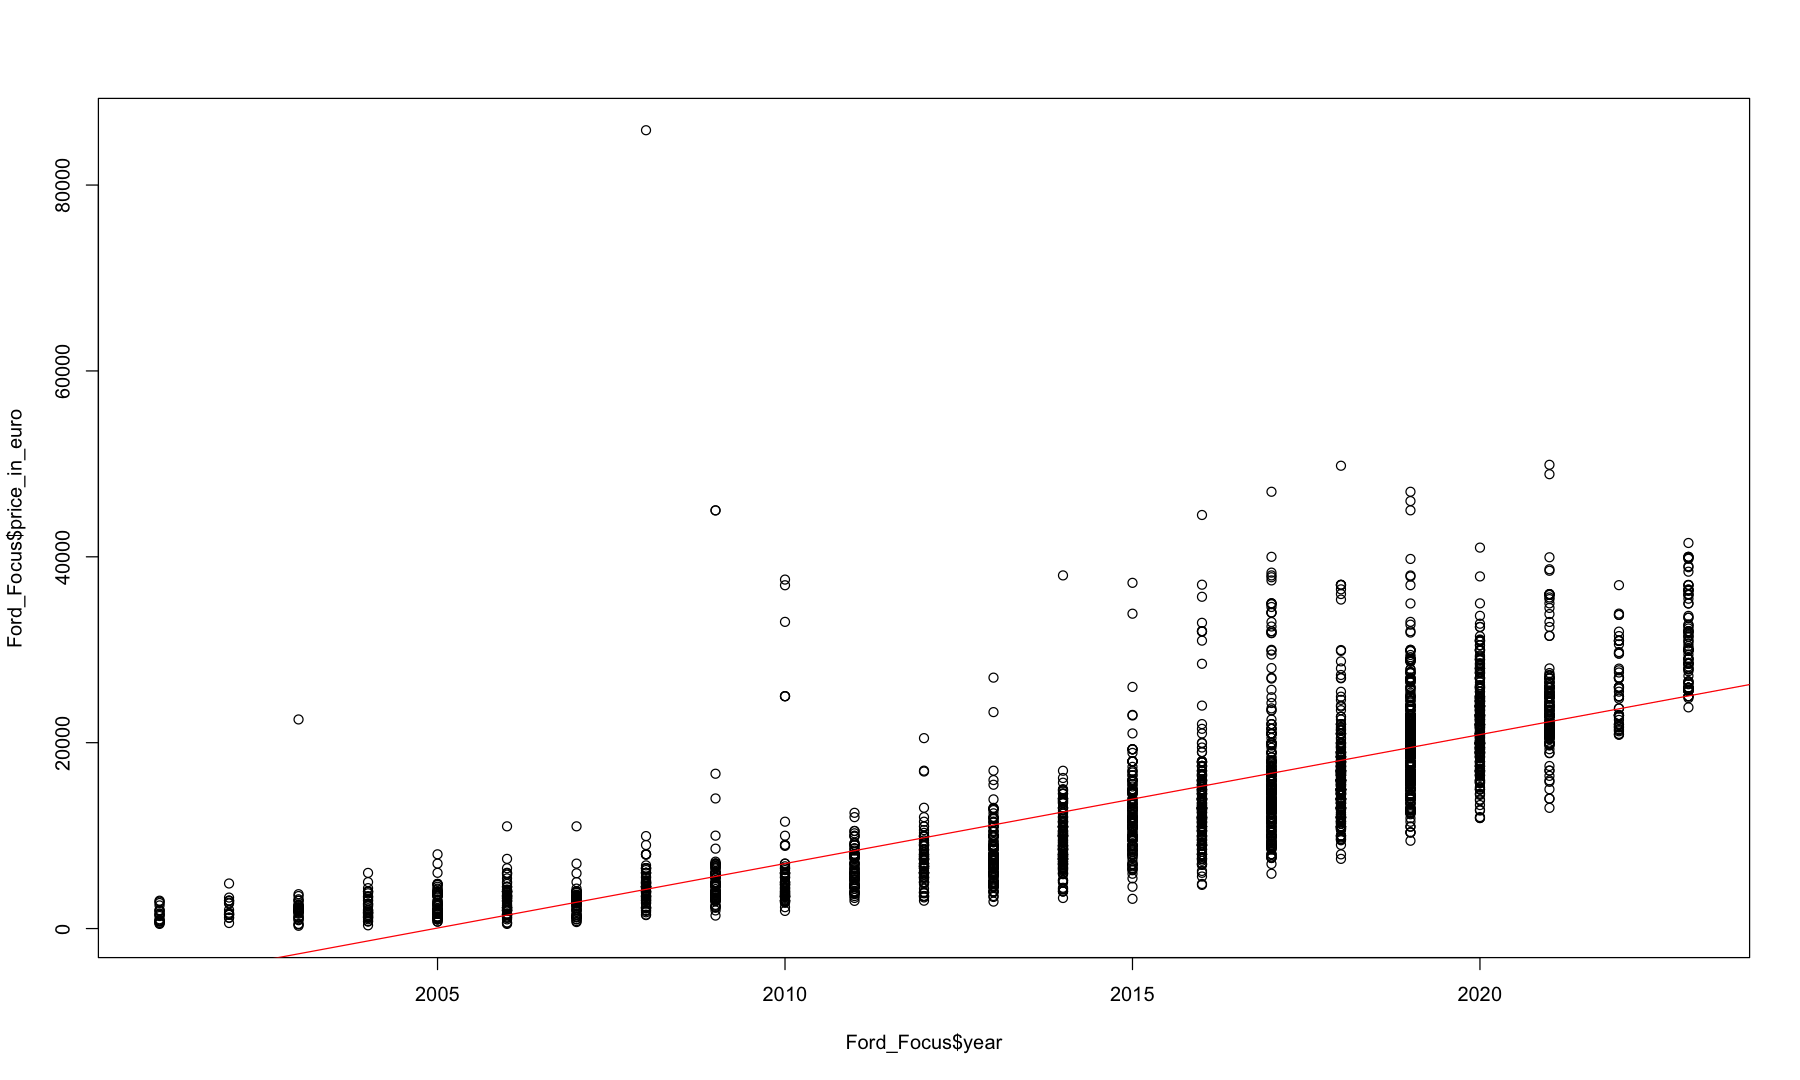

In [632]:
par(bg = 'white')
plot(Ford_Focus$price_in_euro ~ Ford_Focus$year)
r <- lm(Ford_Focus$price_in_euro ~ Ford_Focus$year)
abline(r, col='red')
class(r)

In [633]:
summary(r)


Call:
lm(formula = Ford_Focus$price_in_euro ~ Ford_Focus$year)

Residuals:
   Min     1Q Median     3Q    Max 
-10811  -3294   -725   2169  81679 

Coefficients:
                   Estimate  Std. Error t value            Pr(>|t|)    
(Intercept)     -2782387.82    38263.33  -72.72 <0.0000000000000002 ***
Ford_Focus$year     1387.75       18.98   73.11 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5345 on 3286 degrees of freedom
Multiple R-squared:  0.6193,	Adjusted R-squared:  0.6191 
F-statistic:  5345 on 1 and 3286 DF,  p-value: < 0.00000000000000022


### 다중회귀분석

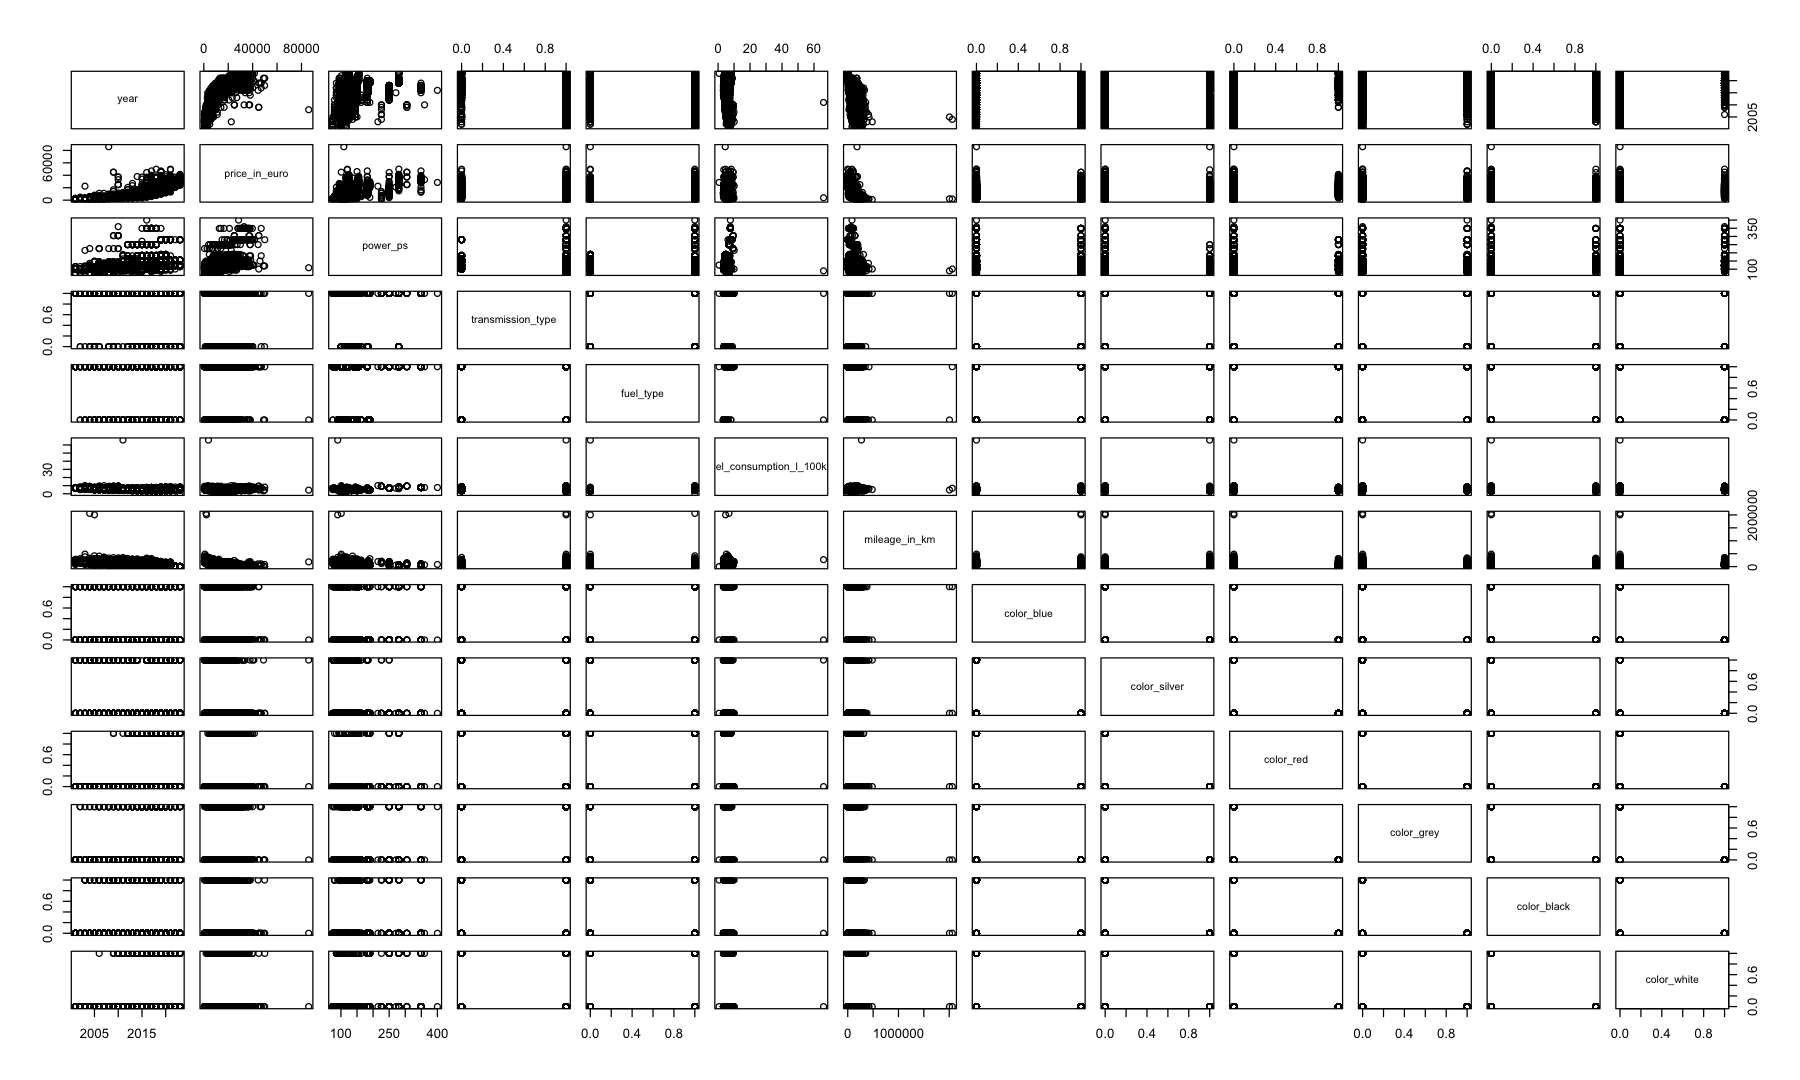

In [634]:
par(bg = 'white')
plot(Ford_Focus$price_in_euro)

In [635]:
model <- lm(price_in_euro ~ ., data=Ford_Focus)
model


Call:
lm(formula = price_in_euro ~ ., data = Ford_Focus)

Coefficients:
             (Intercept)                      year                  power_ps  
          -2123535.48214                1056.95642                  55.85604  
       transmission_type                 fuel_type  fuel_consumption_l_100km  
             -1258.52153                 620.89323                 346.00521  
           mileage_in_km                color_blue              color_silver  
                -0.01717                1024.40314                 612.96219  
               color_red                color_grey               color_black  
              1073.39061                 449.65779                -194.17309  
             color_white  
                      NA  


In [636]:
summary(model)


Call:
lm(formula = price_in_euro ~ ., data = Ford_Focus)

Residuals:
   Min     1Q Median     3Q    Max 
-20785  -2217   -496   1491  83210 

Coefficients: (1 not defined because of singularities)
                                Estimate      Std. Error t value
(Intercept)              -2123535.482138    45500.729772 -46.670
year                         1056.956416       22.497929  46.980
power_ps                       55.856042        1.880002  29.711
transmission_type           -1258.521531      188.971404  -6.660
fuel_type                     620.893231      194.698957   3.189
fuel_consumption_l_100km      346.005214       60.414919   5.727
mileage_in_km                  -0.017171        0.001212 -14.169
color_blue                   1024.403144      272.824640   3.755
color_silver                  612.962186      267.204064   2.294
color_red                    1073.390605      315.705477   3.400
color_grey                    449.657788      268.905205   1.672
color_black           

In [637]:
reduced <- step(model, direction = "backward")

Start:  AIC=54919.06
price_in_euro ~ year + power_ps + transmission_type + fuel_type + 
    fuel_consumption_l_100km + mileage_in_km + color_blue + color_silver + 
    color_red + color_grey + color_black + color_white


Step:  AIC=54919.06
price_in_euro ~ year + power_ps + transmission_type + fuel_type + 
    fuel_consumption_l_100km + mileage_in_km + color_blue + color_silver + 
    color_red + color_grey + color_black

                           Df   Sum of Sq         RSS   AIC
- color_black               1     9184287 58586497516 54918
<none>                                    58577313229 54919
- color_grey                1    49997855 58627311085 54920
- color_silver              1    94095056 58671408285 54922
- fuel_type                 1   181841144 58759154373 54927
- color_red                 1   206698299 58784011528 54929
- color_blue                1   252092648 58829405877 54931
- fuel_consumption_l_100km  1   586492475 59163805704 54950
- transmission_type         1   79

In [638]:
summary(reduced)


Call:
lm(formula = price_in_euro ~ year + power_ps + transmission_type + 
    fuel_type + fuel_consumption_l_100km + mileage_in_km + color_blue + 
    color_silver + color_red + color_grey, data = Ford_Focus)

Residuals:
   Min     1Q Median     3Q    Max 
-20764  -2200   -505   1499  83218 

Coefficients:
                                Estimate      Std. Error t value
(Intercept)              -2126836.516809    45263.643527 -46.988
year                         1058.539598       22.387555  47.283
power_ps                       55.868129        1.879786  29.720
transmission_type           -1264.425497      188.777751  -6.698
fuel_type                     618.353560      194.652260   3.177
fuel_consumption_l_100km      345.718393       60.409110   5.723
mileage_in_km                  -0.017169        0.001212 -14.168
color_blue                   1140.830501      219.170020   5.205
color_silver                  731.839843      209.471553   3.494
color_red                    1185.042113 

## 이상치 특이치 판별
Z-점수 : 평균으로부터의 거리를 표준편차로 나눈 값.
데이터 포인트가 평균으로부터 얼마나 떨어져 있는지를 표준화 작업.
Z-점수가 2.5 이상이면 특이치로 간주.

In [650]:

# Z-점수 계산
mean_data <- mean(Ford_Focus$year)
sd_data <- sd(Ford_Focus$year)
z_scores <- (Ford_Focus$year - mean_data) / sd_data
# Z-점수가 2.5 이상인 데이터를 이상치로 간주하여 제거
final <- Ford_Focus[abs(z_scores) <= 2.5, ]

In [658]:
table(Ford_Focus$year)


2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 
  19   16   31   40   68   76   59   79   80   85   77   92  143  171  159  252 
2017 2018 2019 2020 2021 2022 2023 
 285  372  488  371  181   53   91 

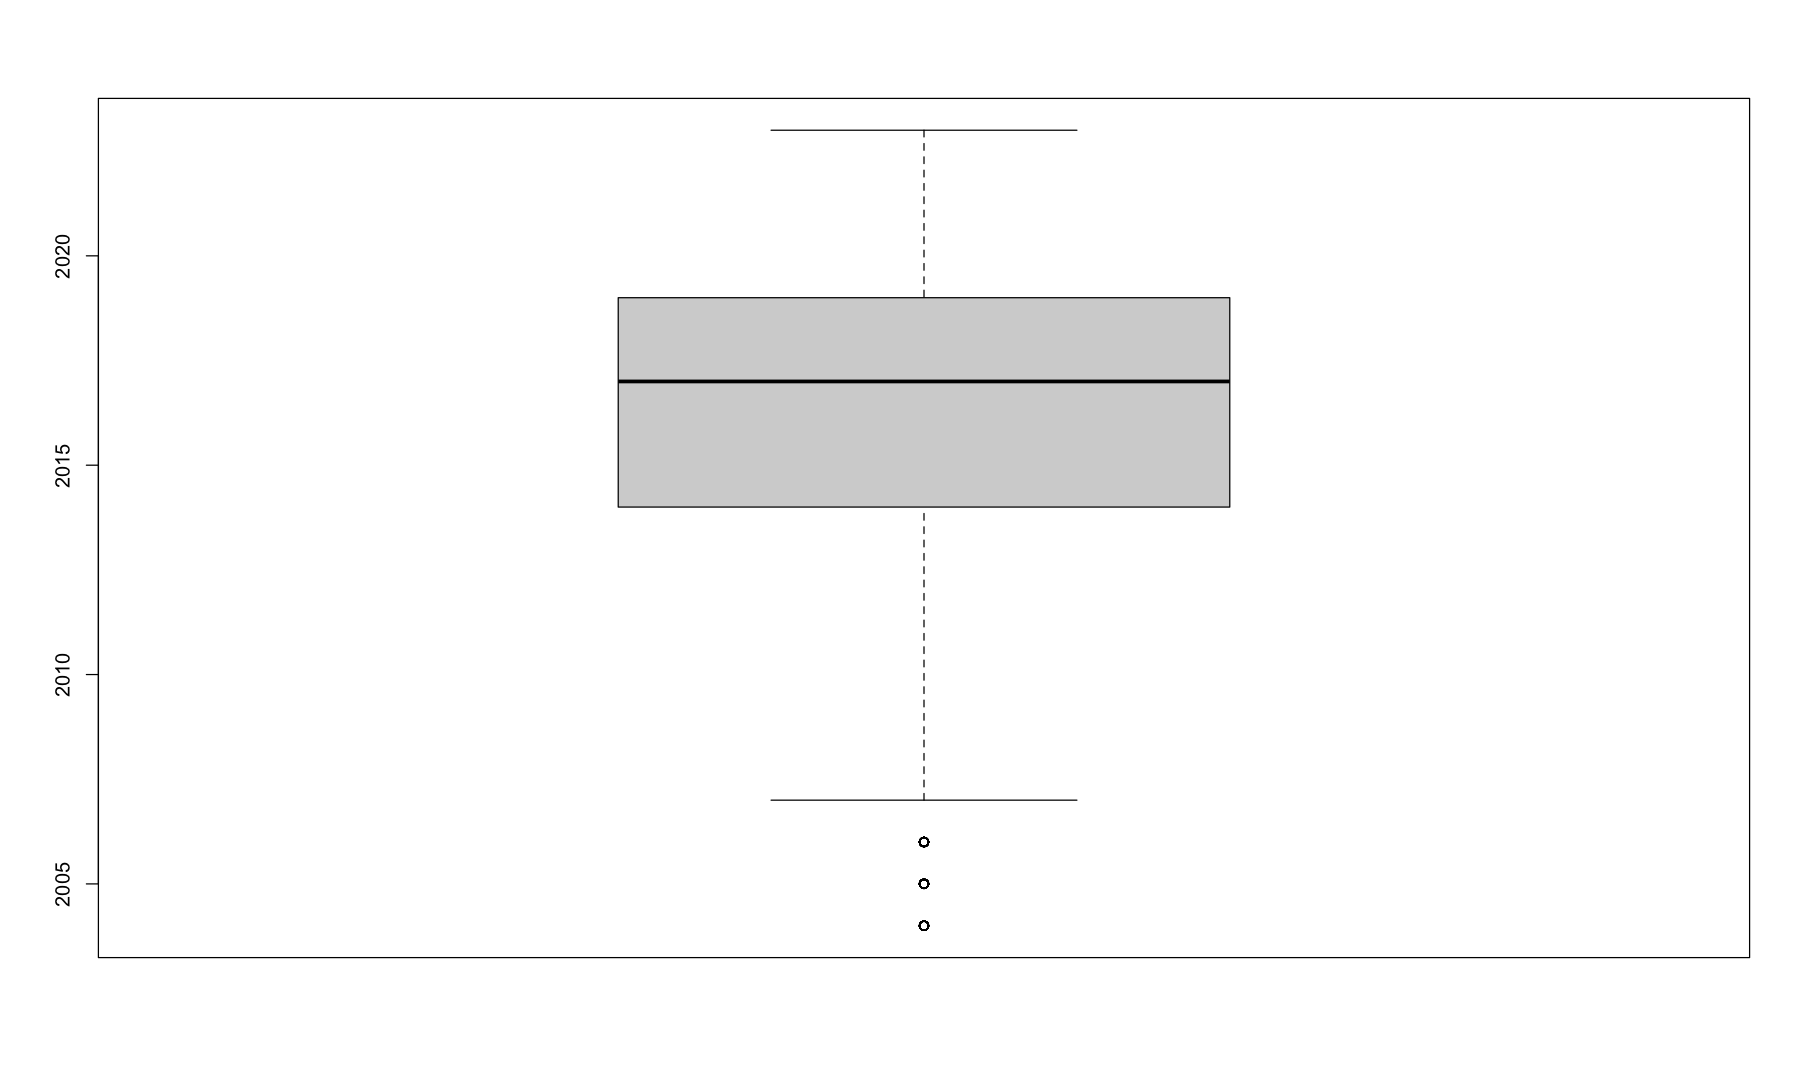

In [652]:
par(bg = 'white') # nolint
boxplot(final$year)

In [648]:
table(Ford_Focus$price_in_euro)
subset(Ford_Focus, price_in_euro)


  300   350   444   499   500   599   600   650   700   750   790   799   800 
    1     1     1     1     2     1     3     1     1     4     1     2     1 
  890   900   990   999  1000  1100  1150  1180  1190  1200  1249  1250  1290 
    1     1     1     3     6     1     4     1     4     3     1     6     1 
 1299  1300  1350  1399  1440  1450  1470  1490  1499  1500  1540  1550  1590 
    2     2     1     1     1     3     1     2     2     7     1     1     2 
 1599  1600  1630  1650  1670  1690  1699  1700  1750  1795  1799  1800  1850 
    2     5     1     1     1     2     2     2     1     1     1     5     2 
 1890  1899  1900  1950  1980  1982  1990  1999  2000  2050  2100  2180  2190 
    1     1     6     4     1     1    10     5     4     1     1     1     1 
 2200  2220  2250  2290  2299  2300  2350  2399  2400  2450  2490  2499  2500 
    7     1     5     1     2     5     1     1     2     1     3     5     3 
 2550  2600  2650  2699  2700  2749  2750  2790  28

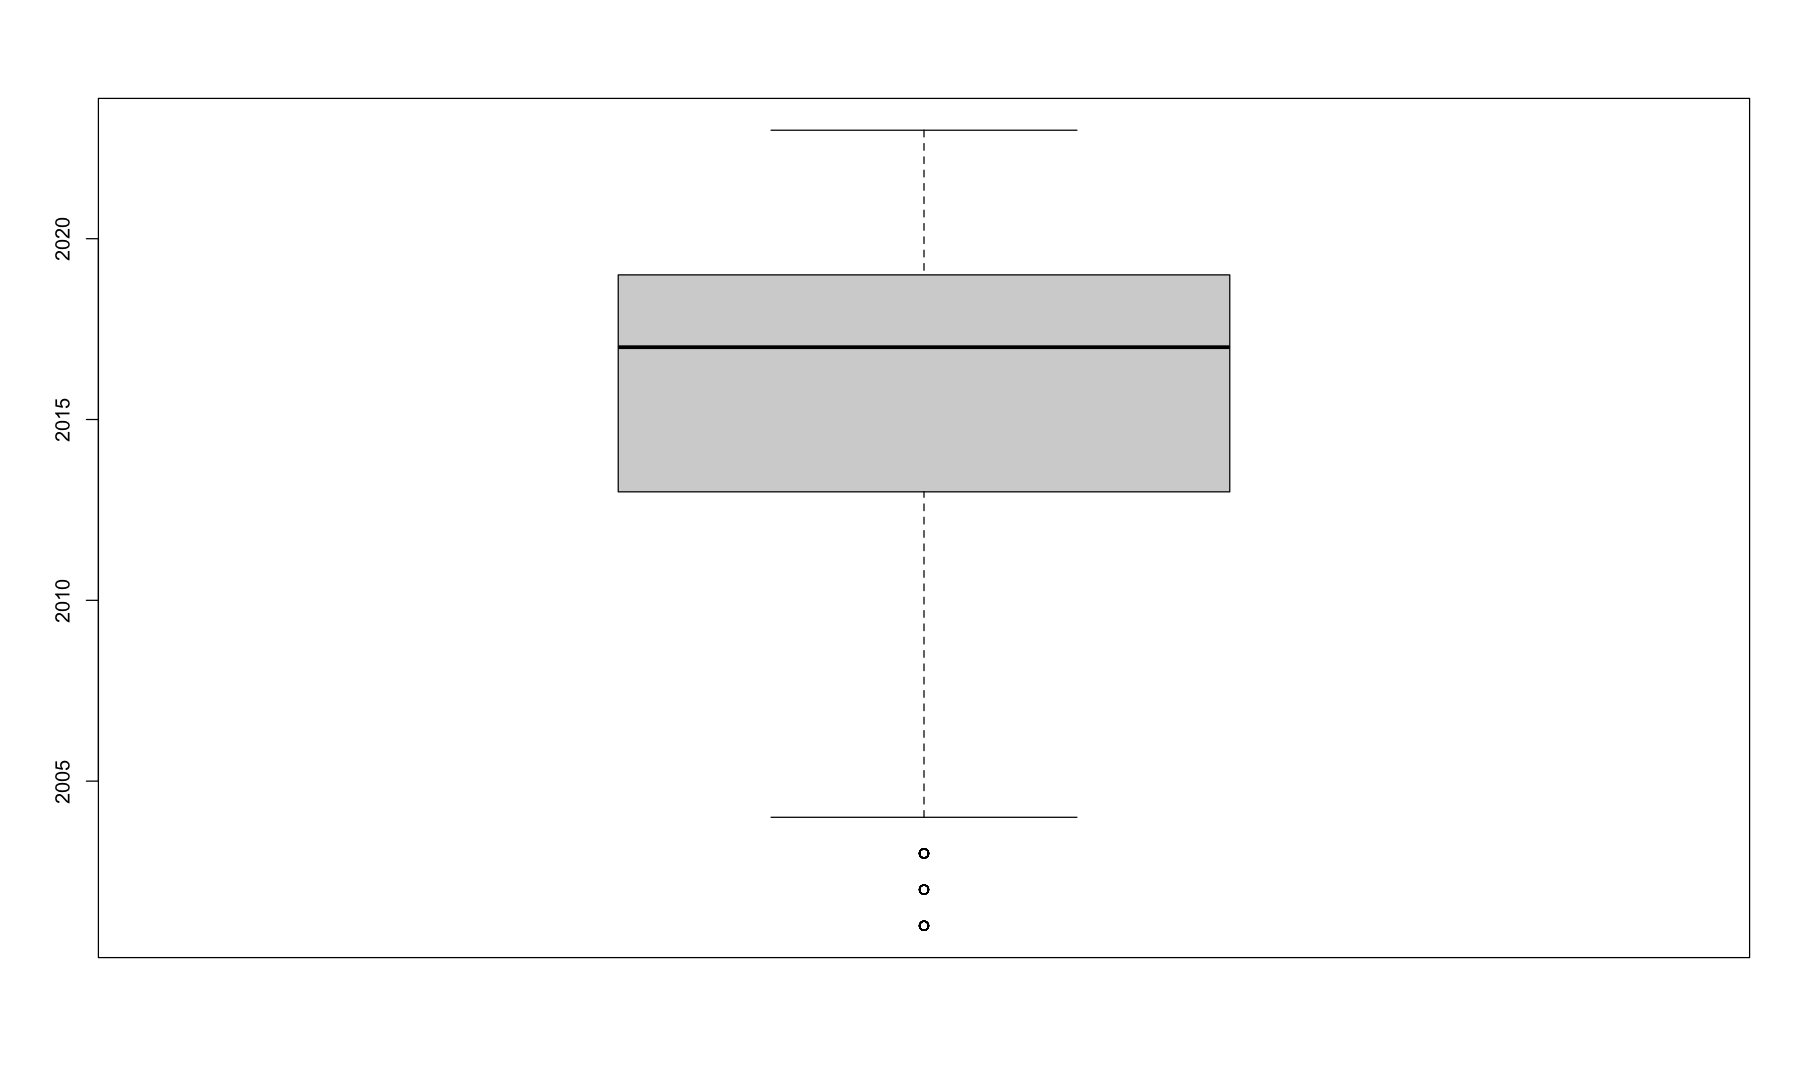

In [655]:
par(bg = 'white')
boxplot(Ford_Focus$year)

In [656]:

# Z-점수 계산
mean_data <- mean(Ford_Focus$year)
sd_data <- sd(Ford_Focus$year)
z_scores <- (Ford_Focus$year - mean_data) / sd_data
# Z-점수가 2.5 이상인 데이터를 이상치로 간주하여 제거
final <- Ford_Focus[abs(z_scores) <= 2.5, ]

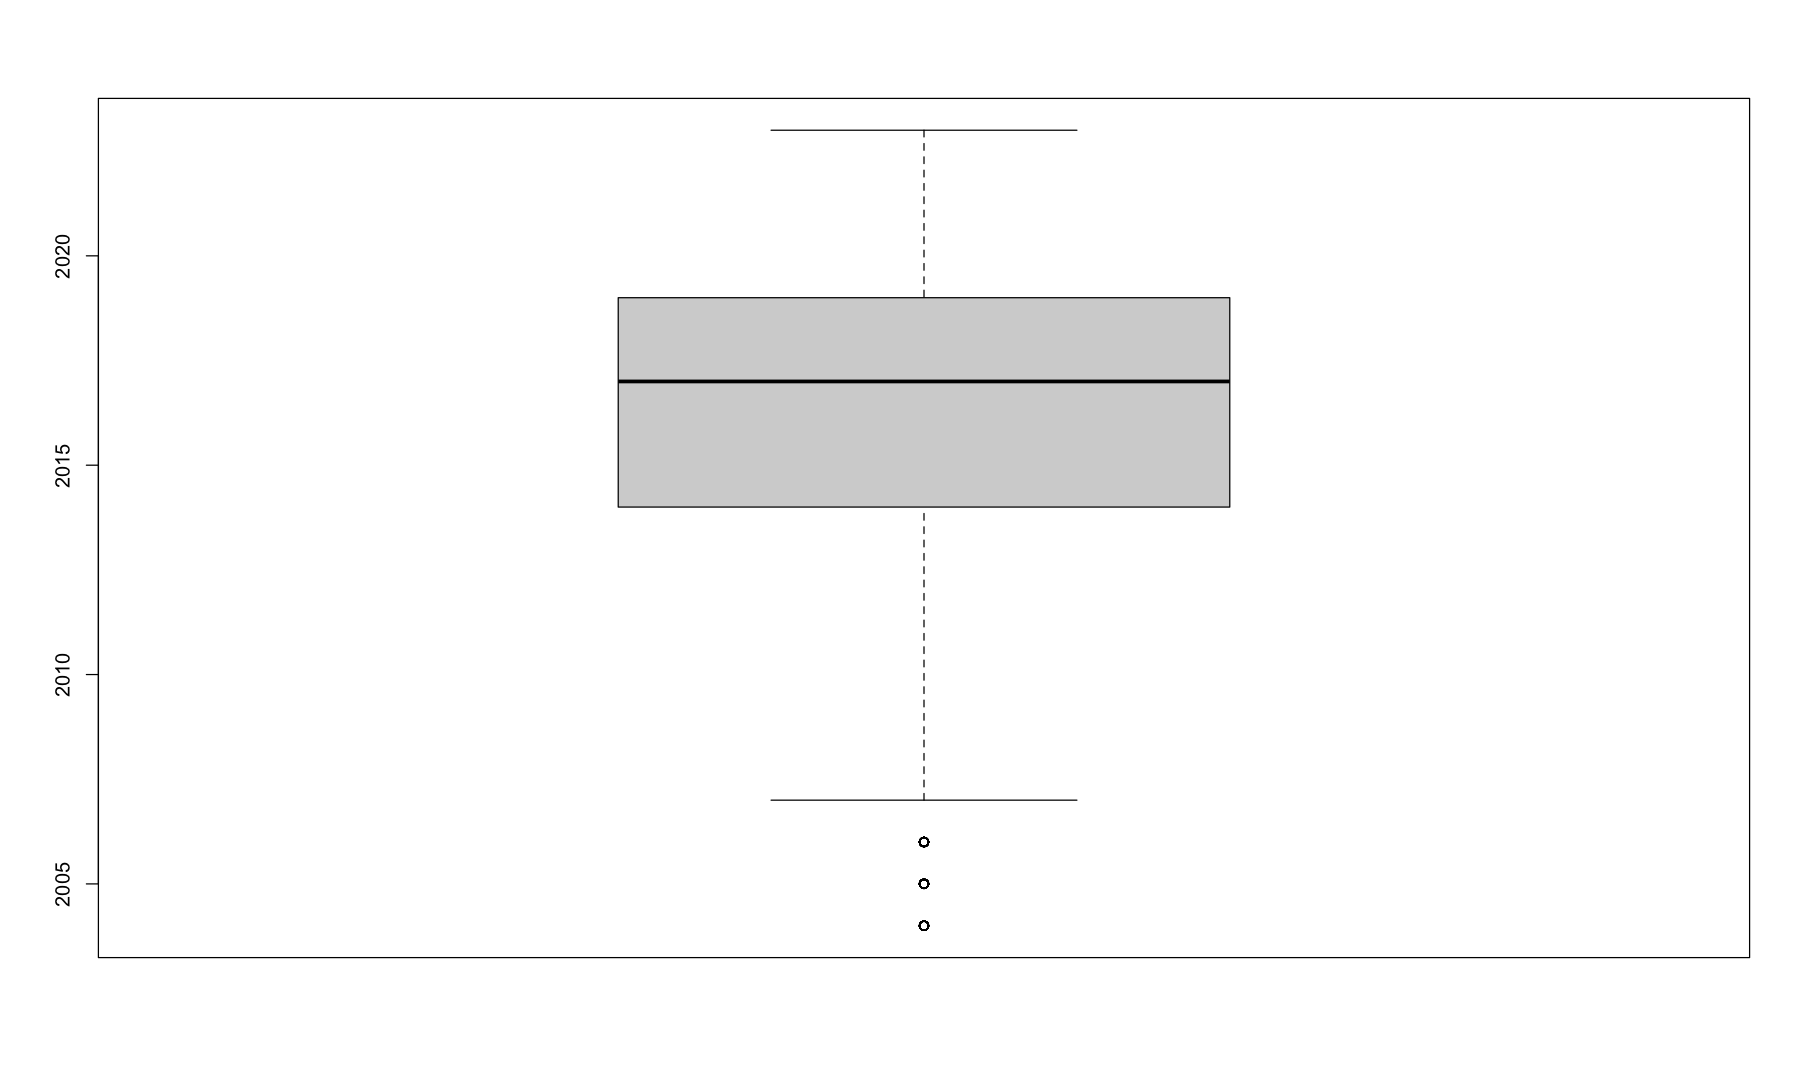

In [657]:
par(bg = 'white')
boxplot(final$year)

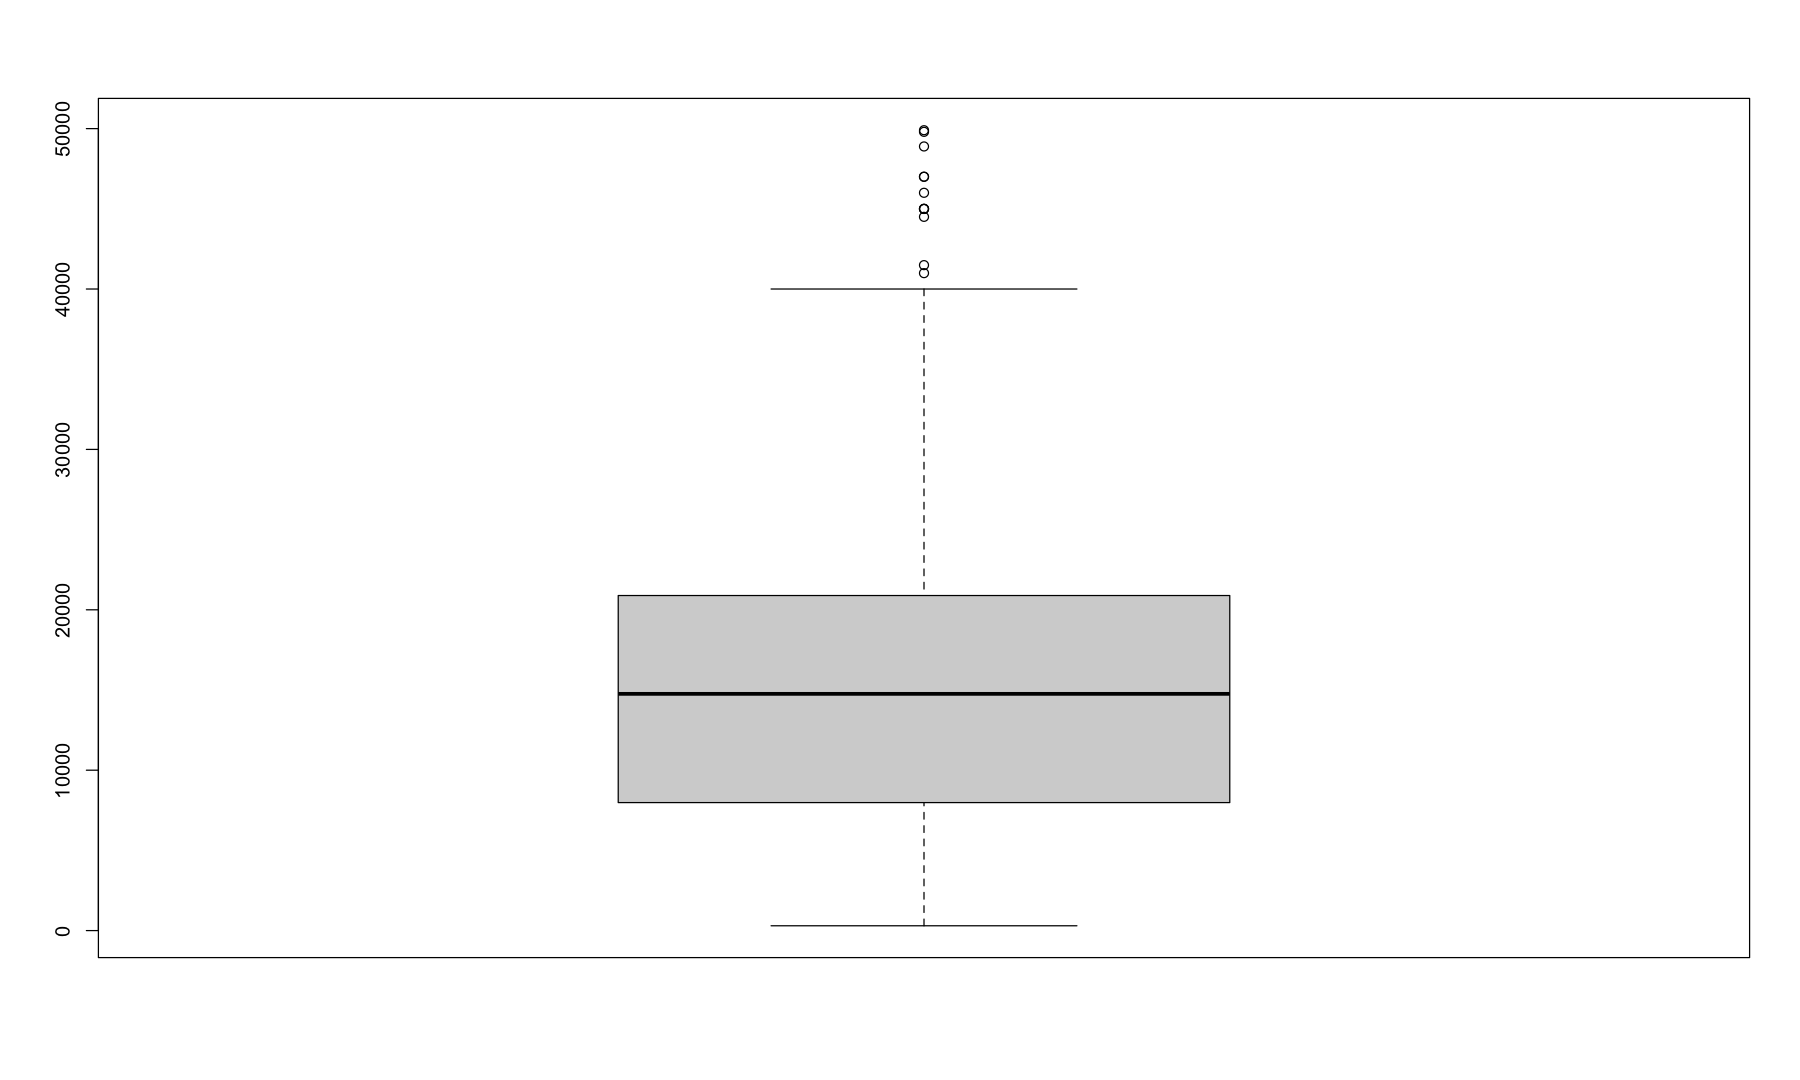

In [663]:
par(bg = 'white')
boxplot(Ford_Focus$price_in_euro)

In [662]:
#Ford_Focus <- subset(Ford_Focus, price_in_euro != '85900')

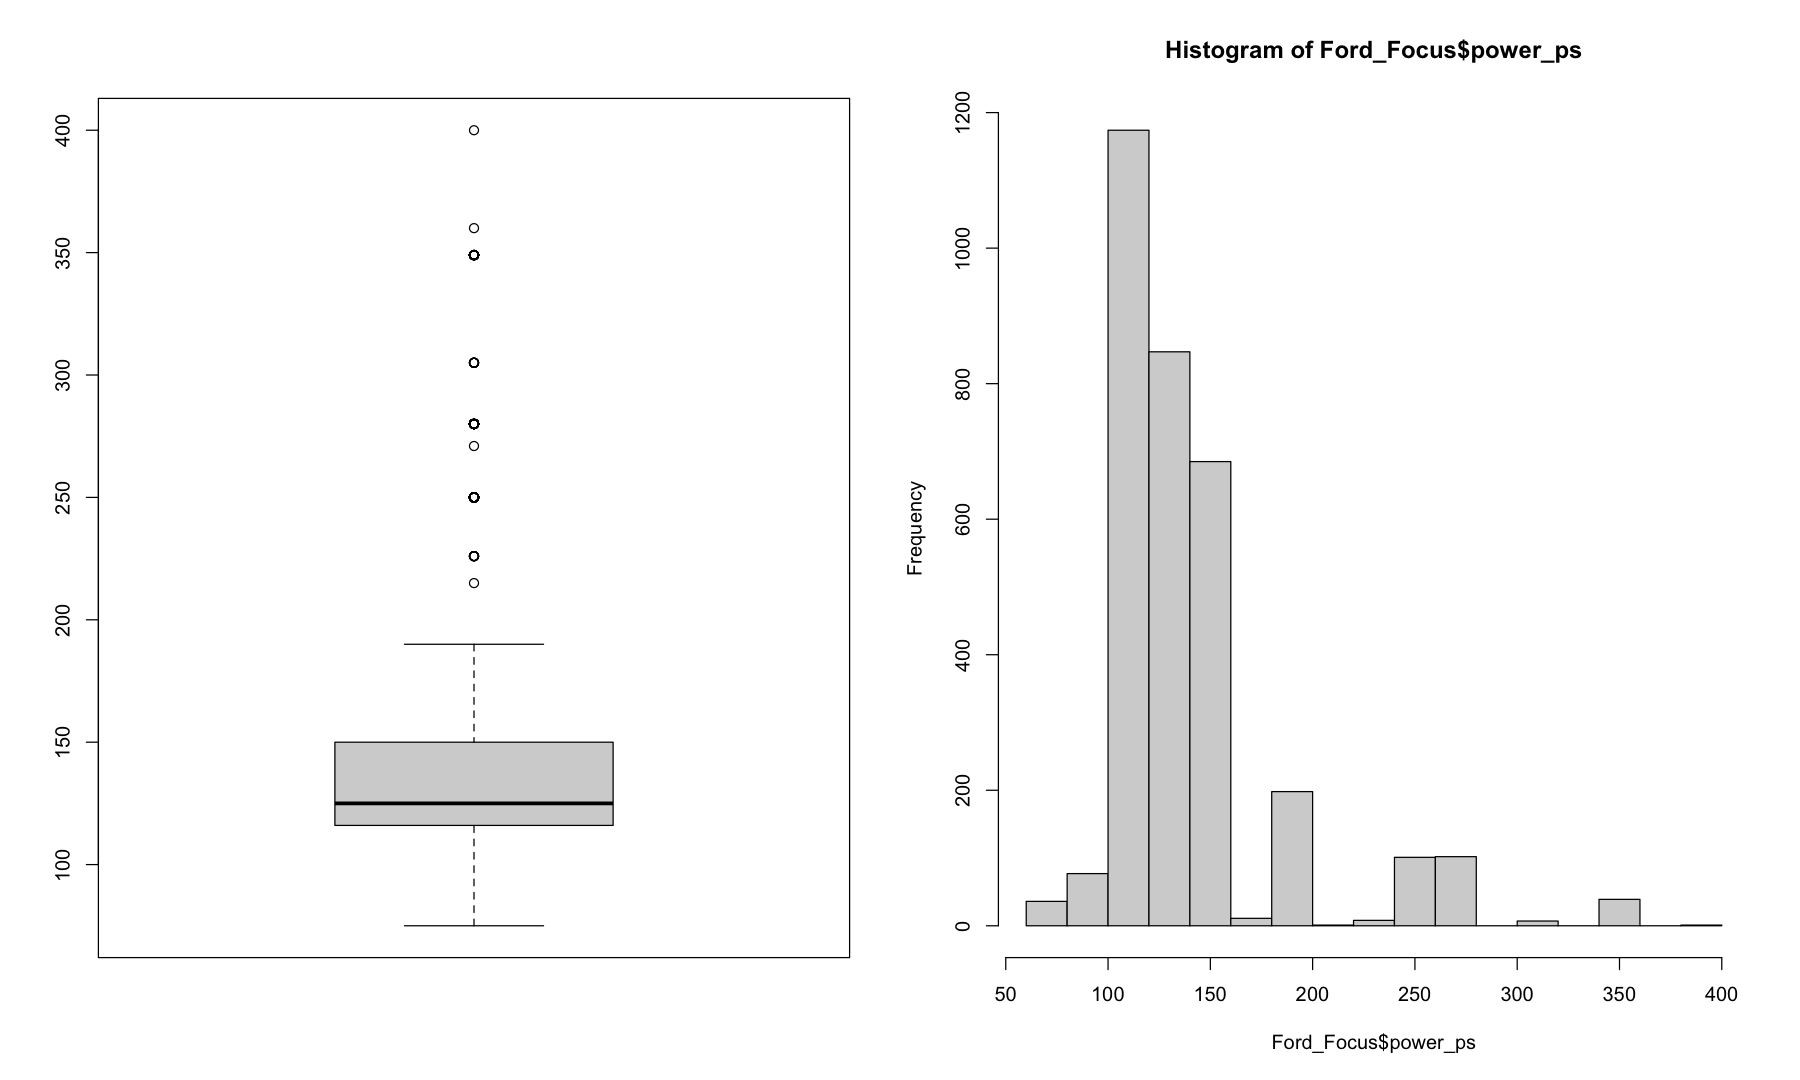

In [670]:
par(bg = 'white'
, mfrow = c(1,2))
boxplot(Ford_Focus$power_ps)
hist(Ford_Focus$power_ps)

IQR=Q3−Q1
Lower Bound=Q1−1.5×IQR
Upper Bound=Q3−1.5×IQR

In [676]:
a <- 6.1 - 4.4
b <- 4.4 - (1.5*a)
c <- 6.1 + (1.5*a)

In [677]:
b 
c

[1] 1.85

[1] 8.65

1.85 < 내값들
8.65 > 

In [674]:
summary(Ford_Focus$fuel_consumption_l_100km)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.600   4.400   5.100   5.366   6.100  66.000 

In [ ]:
table

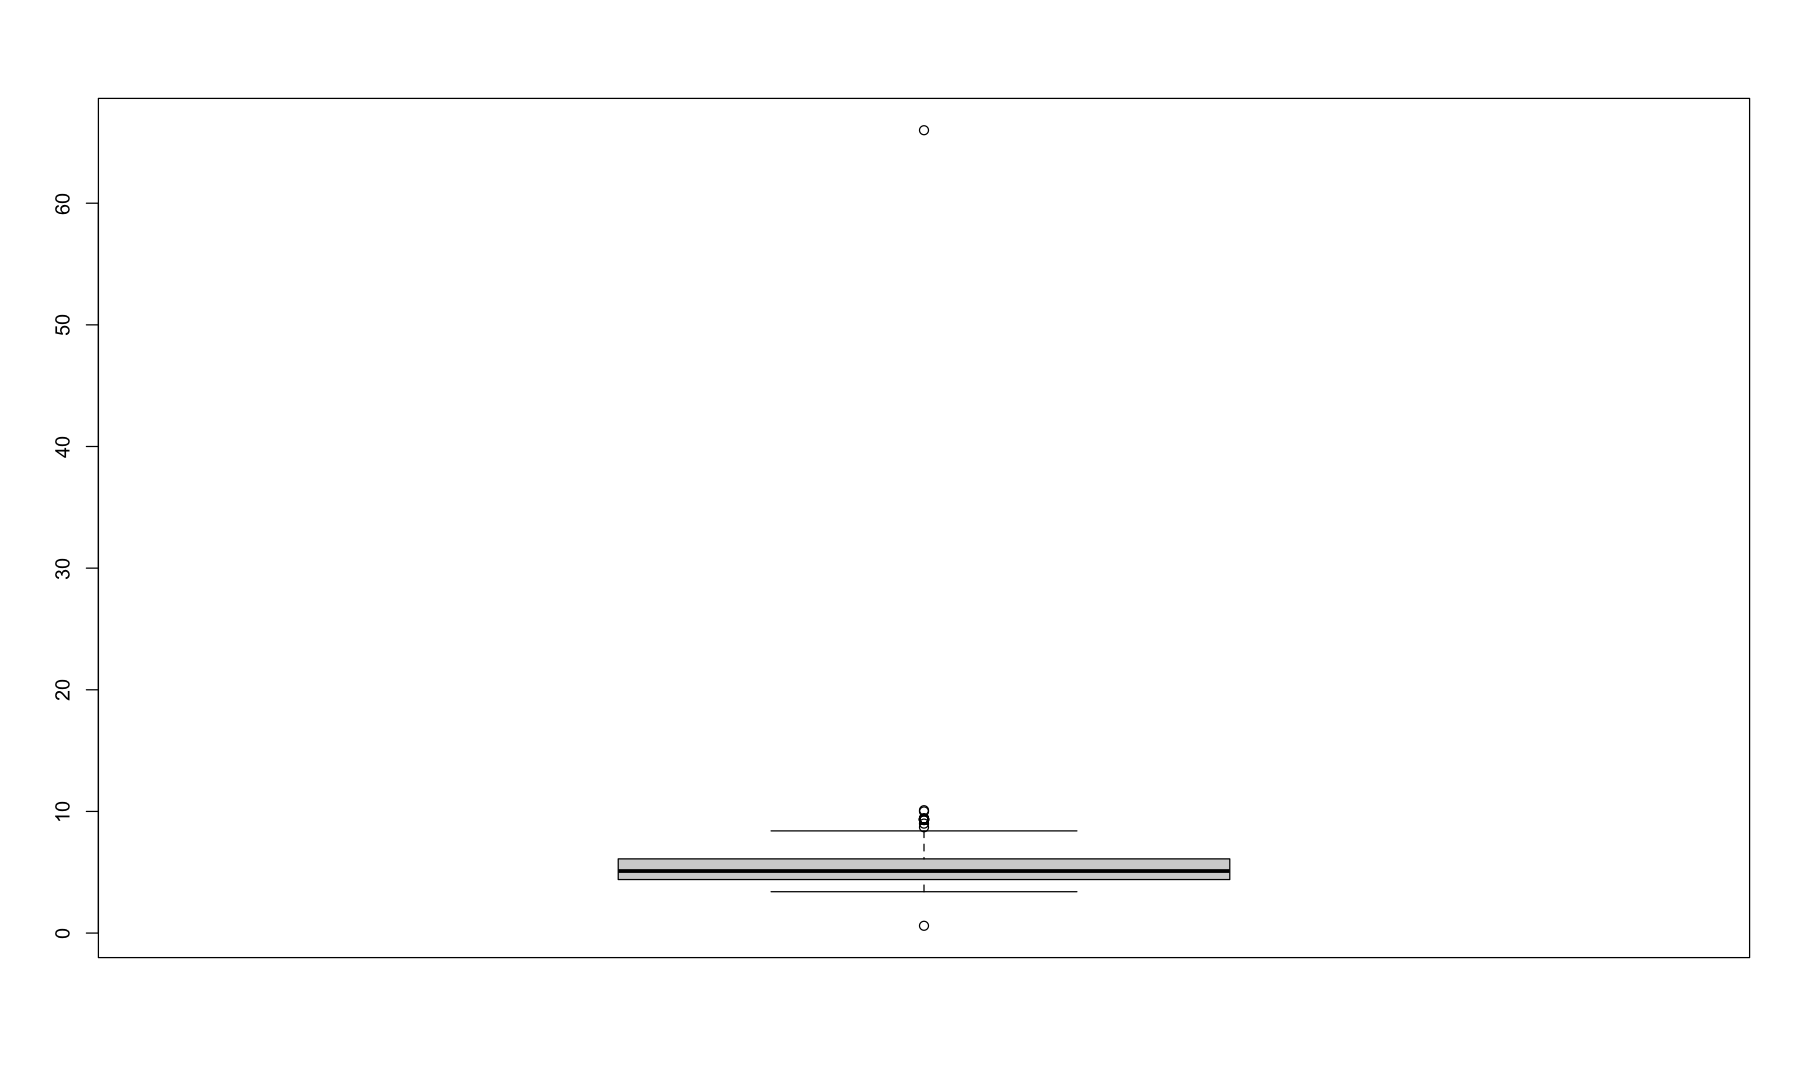

In [673]:
par(bg = 'white')
boxplot(Ford_Focus$fuel_consumption_l_100km)


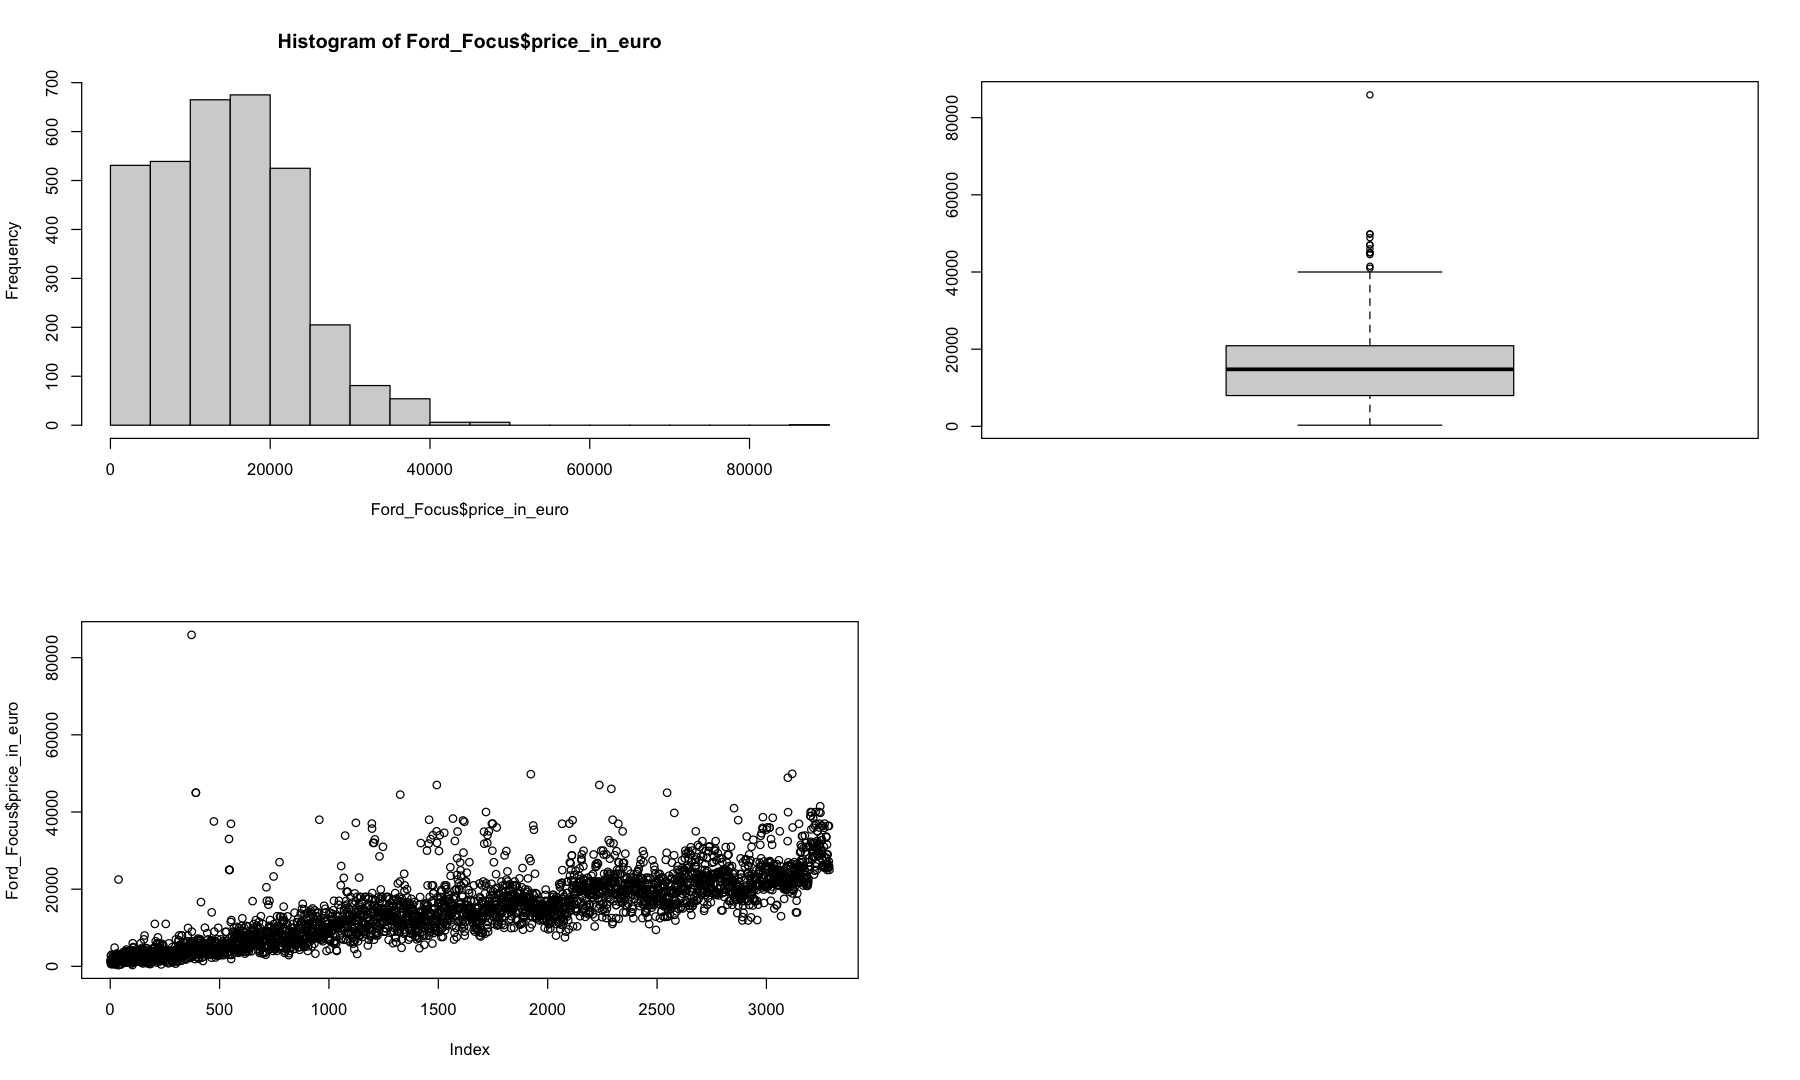

In [628]:
par(bg = 'white' , mfrow = c(2,2))
hist(Ford_Focus$price_in_euro)
boxplot(Ford_Focus$price_in_euro)
plot(Ford_Focus$price_in_euro)


In [ ]:
par(bgt = 'white')
boxplot(Ford)

In [411]:
ingong <- function(A,mod) {
for(i in 1:A) {
sampA <- createDataPartition(mod$price_in_euro, p =0.7 , list = F)
data.trA <- mod[sampA,]
data.testA <- mod[-sampA,]

model.nnetA <- nnet(price_in_euro ~ ., data=data.trA, size = 6) # size : 층 갯수

xA <- subset(data.testA, select = -price_in_euro)
yA <- data.testA$price_in_euro

predA <- predict(model.nnetA, xA, type = "raw") # class : 객관식 , raw : 주관식

mean(predA == yA)
cat("\n인공신경망 예측율 ", mean(predA == yA),"\t")
	}

cat("\n------------------------------------\n")
cat("\n인공신경망 평균 예측율 :", mean(mean(predA == yA)),"\n")
table(predA,yA)
}



In [412]:
ingong(A = 10,mod = Ford_Focus)

# weights:  85
initial  value 680395789422.565674 
final  value 680354599526.000000 
converged

인공신경망 예측율  0 	# weights:  85
initial  value 681972494169.282837 
final  value 681941383568.000000 
converged

인공신경망 예측율  0 	# weights:  85
initial  value 684920160565.202515 
final  value 684901574104.000000 
converged

인공신경망 예측율  0 	# weights:  85
initial  value 682534614539.096191 
final  value 682510547564.000000 
converged

인공신경망 예측율  0 	# weights:  85
initial  value 672946284334.615356 
final  value 672903459398.000000 
converged

인공신경망 예측율  0 	# weights:  85
initial  value 681189454676.775879 
final  value 681147449036.000000 
converged

인공신경망 예측율  0 	# weights:  85
initial  value 682011855397.847534 
final  value 681995907326.000000 
converged

인공신경망 예측율  0 	# weights:  85
initial  value 686886159411.442139 
final  value 686842182124.000000 
converged

인공신경망 예측율  0 	# weights:  85
initial  value 684198493391.746094 
final  value 684147552496.000000 
converged

인공신경망 예측율  0 	# weights:

     yA
predA 350 444 499 650 700 750 790 799 800 890 900 990 999 1000 1150 1190 1299
    1   1   1   1   1   1   1   1   1   1   1   1   1   1    1    2    1    2
     yA
predA 1470 1490 1499 1500 1599 1670 1700 1750 1799 1800 1900 1950 1982 1990
    1    1    1    1    1    2    1    2    1    1    3    2    1    1    5
     yA
predA 2050 2180 2190 2200 2250 2299 2399 2490 2499 2500 2550 2700 2749 2750
    1    1    1    1    2    3    1    1    1    3    1    1    1    1    1
     yA
predA 2790 2900 2950 2980 2999 3000 3199 3200 3290 3350 3390 3399 3400 3450
    1    1    1    1    1    6    3    1    2    1    2    1    1    2    1
     yA
predA 3480 3490 3499 3500 3600 3650 3700 3790 3799 3800 3840 3890 3950 3990
    1    1    4    1    3    2    2    1    1    1    3    1    1    1    3
     yA
predA 3995 3999 4000 4190 4199 4300 4390 4395 4490 4499 4500 4600 4650 4695
    1    1    3    5    1    1    3    1    1    2    1    4    1    1    1
     yA
predA 4700 4789 4790 4799 48

Ford_Focus
Ford_Mondeo
Ford_Fiesta

In [ ]:
# 객관식 함수 모음
myTest <- function(A, dataName, coln, ntreecount, per) {
cat("------------------------------------\n")
cat("예측율\n")
# 라이브러리 받기
library(caret)
library(e1071)
library(nnet)
library(randomForest)
for(i in 1:A) {
sampA <- createDataPartition(dataName$Species, p = per, list = F)
# 학습용    
data.trA <- dataName[sampA,]
# 검증용
data.testA <- dataName[-sampA,]
# 문제
xA <- subset(data.testA, select = - Species)
# 답
yA <- data.testA$Species
# 문제풀기  ( 랜덤 포레스트)
rfA <- randomForest(Species ~ ., data=data.trA, ntree = ntreecount )
# ( SVM )
model <- svm(Species ~ ., data=data.trA)

# 예측
# 랜덤 포레스트
predA <- predict(rfA, xA)

# SVM
pred2A <- predict(model,xA)

# 랜덤 포레스트
cat("\nRandomForest 예측율 ", mean(predA == yA),"\t")
cat("\n SVM 예측율 ", mean(yA == pred2A),"\t")

}
# SVM



cat("\n------------------------------------\n")
cat("\nRandom Forest의 평균 예측율 :", mean(mean(predA == yA)),"\n")
cat("------------------------------------\n")
cat("\nSVM의 평균 예측율 :", mean(mean(pred2A == yA)),"\n")
cat("------------------------------------\n")

}